#### Save to CSV

In [ ]:
all_data.to_csv('hs300_20100101-20171124.csv')
print(all_data.shape)
print(all_data.head())

#### Read from CSV

In [ ]:
rb = pd.read_csv('hs300_20100101-20171124.csv', index_col=[1], dtype={'code':str})

# set index
rb.set_index([rb['code'], rb.index], inplace=True)
# remove duplicated 'code.1'
rb.drop(['code.1'], axis=1, inplace=True)

print(rb.head(5))
print(rb.shape)
all_data = rb

### 学习使用Tushare， 下载A股数据

参考：
- [1]: https://mp.weixin.qq.com/s?__biz=MzAwOTgzMDk5Ng==&mid=2650833972&idx=1&sn=4de9f9ee81bc8bf85d1e0a4a8f79b0de&chksm=80adb30fb7da3a19817c72ff6f715ee91d6e342eb0402e860e171993bb0293bc4097e2dc4fe9&mpshare=1&scene=1&srcid=1106BPAdPiPCnj6m2Xyt5p2M#wechat_redirect
- [2]: http://tushare.org/

In [24]:
import sys
sys.path.append('C:\\Users\\docul\\ai4stocks-projects\\myStockAILib')
import stockbasic as sb
import dataprep as dp


import pandas as pd
import tushare as ts
print(ts.__version__)

1.0.2


In [25]:
dp.test_sync()

exits 2.0


### Matplotlib 显示 inline

In [29]:
import matplotlib as mpl
%matplotlib inline

# Matplotlib 显示中文
mpl.rcParams['font.sans-serif'] = ['SimHei']  #指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  #解决保存图像是负号'-'显示为方块的问题


### 例子，由沪深300 成分股，生成训练集

#### Fetch full data sets

In [65]:
stock_list_hs300 = ts.get_hs300s()  # 沪深300成分股


C:\Users\docul\Anaconda3\envs\ai4stocks\lib\site-packages\tushare\stock\classifying.py:202: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead
  ct.PAGES['hs300w']), parse_cols=[0, 3, 6])


In [66]:
# set index
stock_list_hs300.set_index([stock_list_hs300['code'], stock_list_hs300.index], inplace=True)

stock_list_hs300.head(1)

,,code,name,date,weight
code,,,,,
601933,0,601933,永辉超市,2017-09-01,0.25


In [67]:
stock_list_hs300.sort_values(['weight'])

,,code,name,date,weight
code,,,,,
002841,125,002841,视源股份,2017-09-01,0.03
002839,141,002839,张家港行,2017-09-01,0.03
601127,71,601127,小康股份,2017-09-01,0.03
002831,94,002831,裕同科技,2017-09-01,0.03
601966,75,601966,玲珑轮胎,2017-09-01,0.04
000555,203,000555,神州信息,2017-09-01,0.04
002797,62,002797,第一创业,2017-09-01,0.04
603160,17,603160,汇顶科技,2017-09-01,0.04
600871,60,600871,石化油服,2017-09-01,0.05


In [68]:
# keep only '000002' 万科A and '601318' 中国平安
'''
new_sl = stock_list_hs300[stock_list_hs300['code'] == '601318']
new_sl = new_sl.append(stock_list_hs300[stock_list_hs300['code'] =='000002'])
new_sl = new_sl.append(stock_list_hs300[stock_list_hs300['code'] =='600036'])
new_sl = new_sl.append(stock_list_hs300[stock_list_hs300['code'] =='600519'])
new_sl = new_sl.append(stock_list_hs300[stock_list_hs300['code'] =='000333'])


print(new_sl.head())
stock_list_hs300 = new_sl
'''


"\nnew_sl = stock_list_hs300[stock_list_hs300['code'] == '601318']\nnew_sl = new_sl.append(stock_list_hs300[stock_list_hs300['code'] =='000002'])\nnew_sl = new_sl.append(stock_list_hs300[stock_list_hs300['code'] =='600036'])\nnew_sl = new_sl.append(stock_list_hs300[stock_list_hs300['code'] =='600519'])\nnew_sl = new_sl.append(stock_list_hs300[stock_list_hs300['code'] =='000333'])\n\n\nprint(new_sl.head())\nstock_list_hs300 = new_sl\n"

In [69]:
stock_list_hs300

,,code,name,date,weight
code,,,,,
601933,0,601933,永辉超市,2017-09-01,0.25
000503,1,000503,海虹控股,2017-09-01,0.16
601888,2,601888,中国国旅,2017-09-01,0.27
002475,3,002475,立讯精密,2017-09-01,0.25
002714,4,002714,牧原股份,2017-09-01,0.14
002555,5,002555,三七互娱,2017-09-01,0.08
002008,6,002008,大族激光,2017-09-01,0.30
600827,7,600827,百联股份,2017-09-01,0.11
002049,8,002049,紫光国芯,2017-09-01,0.09


In [70]:

sd = '2010-01-01'  # start date
ed = '2016-12-01'  # end date

# fetch all data in the list
all_data = dp.fetch_raw_data(stock_list_hs300, sd, ed)

Fetching Progress: |++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++| 100.0% Complete


In [71]:
print(all_data.shape)
print(all_data.head(2), '\n', all_data.tail(2))

(421276, 7)
                    open  close   high    low    volume    code  mpl.date
code   date                                                              
601933 2010-12-15  3.671  3.701  3.918  3.635  763489.0  601933  734121.0
       2010-12-16  3.777  3.929  4.064  3.726  497805.0  601933  734122.0 
                      open   close    high     low   volume    code  mpl.date
code   date                                                                 
601877 2016-11-30  21.807  21.531  22.053  21.433  74366.0  601877  736298.0
       2016-12-01  21.511  21.502  21.620  21.393  45863.0  601877  736299.0


#### Get 同一时段 沪深300 指数

In [72]:
hs300_data = ts.get_k_data('399300', index=True, start=sd, end=ed)

In [73]:
hs300_data.shape

(1679, 7)

In [74]:
hs300_data['mpl.date'] = dp.date_to_num(hs300_data['date'].values)
print(hs300_data.head())

         date      open     close     high      low      volume      code  \
0  2010-01-04  3592.468  3536.221  3597.75  3535.38  66101080.0  sz399300   
1  2010-01-05  3545.186  3564.038  3577.53  3497.66  85809641.0  sz399300   
2  2010-01-06  3558.700  3542.209  3588.83  3541.17  78473125.0  sz399300   
3  2010-01-07  3543.160  3472.313  3558.56  3452.77  80350037.0  sz399300   
4  2010-01-08  3456.908  3480.403  3482.08  3426.70  60613533.0  sz399300   

   mpl.date  
0  733776.0  
1  733777.0  
2  733778.0  
3  733779.0  
4  733780.0  


#### Generate Stock Features

In [75]:
# Input: all_data, MultiIndex'ed by 'code' and 'date'
#

CONST_DROP_THRESHOLD = 1000

# init
all_data_and_features = pd.DataFrame()  # stock data with all available features, such as 'SQZ', 'HIST1', and all.
features_frames = []

stock_list = all_data.groupby(level=0).size().reset_index(name='counts')
# Initial call to print 0% progress
total = stock_list.shape[0]
i = 0
dp.printProgressBar(i, total, prefix = 'Progress:', suffix = 'Complete', length = 60)


for index, row in stock_list.iterrows():  # iterate the stock list
    # slicing one stock_data
    stock_data = all_data.loc[row['code']]
    
    # skip if stock_data has less than CONST_DROP_THRESHOLD bars
    if stock_data.shape[0] < CONST_DROP_THRESHOLD:
        i += 1
        print('DROP ' + row['code'])
        continue
        
    # print(row['code'], row['name'])
    # print(stock_data.shape)
    
    # add 'EMA8', 'EMA21'
    stock_data = stock_data.join(sb.ttm_propulsion(stock_data))
    # add SQZ
    stock_data = stock_data.join(sb.ttm_squeeze(stock_data))
    # add WAVE
    stock_data = stock_data.join(sb.ttm_wave(stock_data))
    # add ADX
    stock_data = stock_data.join(sb.talib_adx(stock_data))
    # add ATR
    stock_data = stock_data.join(sb.talib_atr(stock_data))
    # add N-bar LOW
    stock_data = stock_data.join(sb.talib_nbarlow(stock_data, N_BAR_LOWEST = 10))
    
    # add stock_data into frames
    features_frames.append(stock_data)
    
    # update progress bar
    i += 1
    dp.printProgressBar(i, total, prefix = 'Progress:', suffix = 'Complete', length = 60)


# append to all_data_and_features
all_data_and_features = pd.concat(features_frames)

# MulitIndex with both 'code' and 'date'
all_data_and_features.set_index([all_data_and_features['code'], all_data_and_features.index], inplace=True)

print('original all_data: ')
print(all_data.columns, '\n', all_data.shape)

print('after adding featuresa: ')
print(all_data_and_features.columns, '\n', all_data_and_features.shape)
print(all_data_and_features.head())

DROP 000156+-----------------------------------------------------------| 2.7% Complete
DROP 000166++----------------------------------------------------------| 3.4% Complete
DROP 000333
DROP 001979+++++++++++-------------------------------------------------| 18.4% Complete
DROP 002602++++++++++++++++++++----------------------------------------| 33.3% Complete
DROP 002714++++++++++++++++++++----------------------------------------| 34.0% Complete
DROP 002736
DROP 002739
DROP 002797
DROP 300315+++++++++++++++++++++++-------------------------------------| 39.8% Complete
DROP 600023+++++++++++++++++++++++++-----------------------------------| 43.2% Complete
DROP 600705+++++++++++++++++++++++++++++++++++++++++-------------------| 69.4% Complete
DROP 600919+++++++++++++++++++++++++++++++++++++++++++++---------------| 75.2% Complete
DROP 600926
DROP 600958
DROP 600959
DROP 600977
DROP 601021++++++++++++++++++++++++++++++++++++++++++++++--------------| 78.2% Complete
DROP 601127+++++++++++++++

In [76]:
stock_list = all_data.groupby(level=0).size().reset_index(name='counts')
for index, row in stock_list.iterrows():
    print(row['code'])

000001
000002
000008
000009
000060
000063
000069
000100
000156
000157
000166
000333
000338
000402
000413
000415
000423
000425
000503
000538
000540
000555
000559
000568
000623
000625
000627
000630
000651
000671
000686
000709
000718
000725
000728
000738
000750
000768
000776
000783
000792
000793
000826
000839
000858
000876
000895
000917
000938
000959
000961
000963
000977
000983
001979
002007
002008
002024
002027
002044
002049
002065
002074
002081
002131
002142
002146
002152
002153
002174
002183
002195
002202
002230
002236
002241
002252
002292
002299
002304
002310
002352
002385
002411
002415
002424
002426
002450
002456
002465
002466
002470
002475
002500
002508
002555
002558
002594
002602
002673
002714
002736
002739
002797
300017
300024
300027
300033
300059
300070
300072
300104
300124
300133
300144
300168
300251
300315
600000
600008
600009
600010
600015
600016
600018
600019
600021
600023
600028
600029
600030
600031
600036
600037
600038
600048
600050
600060
600061
600066
600068
600074
600085

In [77]:
print(all_data.shape)
print(all_data_and_features.shape)

(421276, 7)
(407889, 20)


In [16]:
# to calculate how many stocks we have in all_data_and_features DataFrame
print('How many stocks in all_data_and_features: ')
all_data_and_features.groupby(level=0).size().shape

How many stocks in all_data_and_features: 


(261,)

### 单只股票画像

In [18]:
# dp.plot_stock_data(all_data_and_features[all_data_and_features['code']=='000002'], title_postfix='万科A')

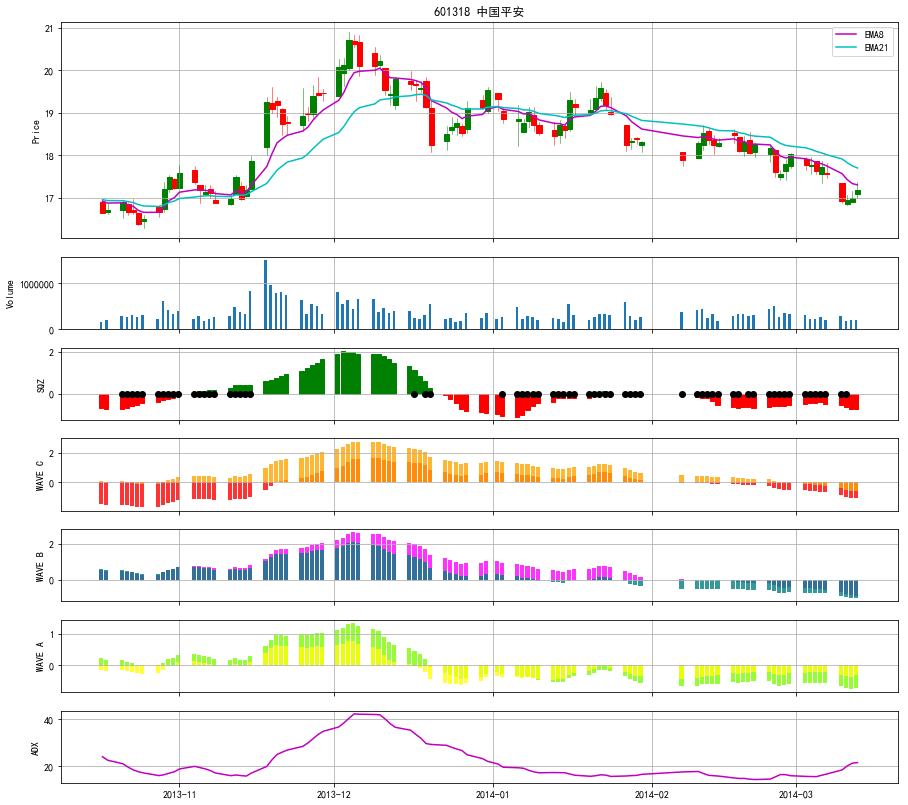

In [78]:
dp.plot_stock_data(all_data_and_features[all_data_and_features['code']=='601318'].iloc[860:960], title_postfix='中国平安')

In [20]:
# print(all_data_and_features[all_data_and_features['code']=='601318'].iloc[880:940][['mpl.date', 'SQUEEZE', 'HIST5', 'MACD6']])

                   mpl.date  SQUEEZE     HIST5     MACD6
code   date                                             
601318 2013-11-14  735186.0        1  0.379731 -1.151997
       2013-11-15  735187.0        1  0.536509 -0.987103
       2013-11-18  735190.0       -1  0.949528 -0.557920
       2013-11-19  735191.0       -1  1.227850 -0.261666
       2013-11-20  735192.0       -1  1.459515 -0.009814
       2013-11-21  735193.0       -1  1.534477  0.084391
       2013-11-22  735194.0       -1  1.594610  0.164332
       2013-11-25  735197.0       -1  1.668993  0.259611
       2013-11-26  735198.0       -1  1.734893  0.347121
       2013-11-27  735199.0       -1  1.868596  0.504875
       2013-11-28  735200.0       -1  1.970126  0.631320
       2013-11-29  735201.0       -1  2.048754  0.735562
       2013-12-02  735204.0       -1  2.234529  0.950493
       2013-12-03  735205.0       -1  2.379236  1.125639
       2013-12-04  735206.0       -1  2.607196  1.387808
       2013-12-05  735207.0    

#### Create Samples

In [21]:
# Initialize X_all and Y_all
X_all = pd.DataFrame()
Y_all = pd.DataFrame()
X_frames = []
Y_frames = []

# Initial call to print 0% progress
total = all_data_and_features.groupby(level=0).size().shape[0]
i = 0
dp.printProgressBar(i, total, prefix = 'Progress:', suffix = 'Complete', length = 60)

for code, onestock_df in all_data_and_features.groupby(level=0):
    onestock_X_all, onestock_Y_all = dp.generate_samples(onestock_df)
    
    # Add sample dataframe to X_frames and Y_frames
    X_frames.append(onestock_X_all)
    Y_frames.append(onestock_Y_all)
    
    # update progress
    i += 1
    dp.printProgressBar(i, total, prefix = 'Progress:', suffix = 'Complete', length = 60)
    
    # testing
    #if i > 5:
    #    break

print('Concat...')
X_all = pd.concat(X_frames)
Y_all = pd.concat(Y_frames)

print('Post processing Y_all...')

# set 'code' as Index in Y_all
Y_all.set_index([Y_all['code'], Y_all.index], inplace=True)

# rename Index
Y_all.index.rename(['code', 'sn'], inplace=True)  # 'sn' is per stock unique.

# Calculate Y_all 'profit'
Y_all['profit'] = Y_all['sell_price']/Y_all['buy_price'] - 1

# update Y_all buy_date and sell_date
buy_dates = []
sell_dates = []

for i in Y_all.index:
    b_date = Y_all.loc[i].buy_date[1]  # truncate string
    buy_dates.append(b_date)
    s_date = Y_all.loc[i].sell_date[1]  # truncate string
    sell_dates.append(s_date)
    
Y_all['buy_date'] = buy_dates
Y_all['sell_date'] = sell_dates

# Calculate Y_all's buy_date and sell_date
# convert date to num
Y_all['mpl.buy_date'] = dp.date_to_num(Y_all['buy_date'].values)
Y_all['mpl.sell_date'] = dp.date_to_num(Y_all['sell_date'].values)
Y_all['hold_days'] = Y_all['mpl.sell_date'] - Y_all['mpl.buy_date']

# Calculate Y_all 'profit.per.day'
Y_all['profit.per.day'] = Y_all['profit']/Y_all['hold_days']

print('Done!')



000001   (1609, 20)----------------------------------------------------| 0.0% Complete
No sell_point for. Skip  ('000001', '2016-09-14')
No sell_point for. Skip  ('000001', '2016-10-25')
No sell_point for. Skip  ('000001', '2016-10-26')
No sell_point for. Skip  ('000001', '2016-10-27')
No sell_point for. Skip  ('000001', '2016-10-28')
No sell_point for. Skip  ('000001', '2016-10-31')
No sell_point for. Skip  ('000001', '2016-11-01')
No sell_point for. Skip  ('000001', '2016-11-02')
No sell_point for. Skip  ('000001', '2016-11-03')
No sell_point for. Skip  ('000001', '2016-11-04')
No sell_point for. Skip  ('000001', '2016-11-07')
No sell_point for. Skip  ('000001', '2016-11-08')
No sell_point for. Skip  ('000001', '2016-11-09')
No sell_point for. Skip  ('000001', '2016-11-10')
No sell_point for. Skip  ('000001', '2016-11-11')
No sell_point for. Skip  ('000001', '2016-11-14')
No sell_point for. Skip  ('000001', '2016-11-15')
No sell_point for. Skip  ('000001', '2016-11-16')
No sell_point

Null values in x_sample. Skip.  ('000069', '2012-05-14')
Null values in x_sample. Skip.  ('000069', '2012-05-15')
Null values in x_sample. Skip.  ('000069', '2012-05-16')
Null values in x_sample. Skip.  ('000069', '2012-05-17')
Null values in x_sample. Skip.  ('000069', '2012-05-18')
Null values in x_sample. Skip.  ('000069', '2012-05-21')
Null values in x_sample. Skip.  ('000069', '2012-05-22')
Null values in x_sample. Skip.  ('000069', '2012-05-23')
Null values in x_sample. Skip.  ('000069', '2012-05-24')
Null values in x_sample. Skip.  ('000069', '2012-05-25')
Null values in x_sample. Skip.  ('000069', '2012-05-28')
Null values in x_sample. Skip.  ('000069', '2012-05-29')
Null values in x_sample. Skip.  ('000069', '2012-05-30')
Null values in x_sample. Skip.  ('000069', '2012-05-31')
Null values in x_sample. Skip.  ('000069', '2012-06-01')
Null values in x_sample. Skip.  ('000069', '2012-06-04')
Null values in x_sample. Skip.  ('000069', '2012-06-05')
No sell_point for. Skip  ('0000

No sell_point for. Skip  ('000538', '2016-06-30')
No sell_point for. Skip  ('000538', '2016-07-01')
No sell_point for. Skip  ('000538', '2016-07-04')
No sell_point for. Skip  ('000538', '2016-07-05')
No sell_point for. Skip  ('000538', '2016-07-06')
No sell_point for. Skip  ('000538', '2016-07-07')
(37560, 20) (313, 6)
000540   (1613, 20)----------------------------------------------------| 6.5% Complete
Null values in x_sample. Skip.  ('000540', '2012-04-11')
Null values in x_sample. Skip.  ('000540', '2012-04-12')
Null values in x_sample. Skip.  ('000540', '2012-04-13')
Null values in x_sample. Skip.  ('000540', '2012-04-16')
Null values in x_sample. Skip.  ('000540', '2012-04-17')
Null values in x_sample. Skip.  ('000540', '2012-04-18')
Null values in x_sample. Skip.  ('000540', '2012-04-19')
Null values in x_sample. Skip.  ('000540', '2012-04-20')
Null values in x_sample. Skip.  ('000540', '2012-04-23')
Null values in x_sample. Skip.  ('000540', '2012-04-24')
Null values in x_sampl

Null values in x_sample. Skip.  ('000651', '2012-05-04')
Null values in x_sample. Skip.  ('000651', '2012-05-07')
Null values in x_sample. Skip.  ('000651', '2012-05-08')
Null values in x_sample. Skip.  ('000651', '2012-05-09')
Null values in x_sample. Skip.  ('000651', '2012-05-10')
Null values in x_sample. Skip.  ('000651', '2012-05-11')
Null values in x_sample. Skip.  ('000651', '2012-05-14')
Null values in x_sample. Skip.  ('000651', '2012-05-15')
Null values in x_sample. Skip.  ('000651', '2012-05-16')
Null values in x_sample. Skip.  ('000651', '2012-05-17')
Null values in x_sample. Skip.  ('000651', '2012-05-18')
Null values in x_sample. Skip.  ('000651', '2012-05-21')
Null values in x_sample. Skip.  ('000651', '2012-05-22')
Null values in x_sample. Skip.  ('000651', '2012-05-23')
Null values in x_sample. Skip.  ('000651', '2012-05-24')
Null values in x_sample. Skip.  ('000651', '2012-05-28')
Null values in x_sample. Skip.  ('000651', '2012-05-29')
Null values in x_sample. Skip. 

(25320, 20) (211, 6)
000728   (1648, 20)----------------------------------------------------| 11.9% Complete
Null values in x_sample. Skip.  ('000728', '2012-05-04')
Null values in x_sample. Skip.  ('000728', '2012-05-07')
Null values in x_sample. Skip.  ('000728', '2012-05-23')
Null values in x_sample. Skip.  ('000728', '2012-05-24')
Null values in x_sample. Skip.  ('000728', '2012-05-25')
Null values in x_sample. Skip.  ('000728', '2012-05-28')
Null values in x_sample. Skip.  ('000728', '2012-05-29')
Null values in x_sample. Skip.  ('000728', '2012-05-30')
Null values in x_sample. Skip.  ('000728', '2012-05-31')
Null values in x_sample. Skip.  ('000728', '2012-06-01')
Null values in x_sample. Skip.  ('000728', '2012-06-05')
Null values in x_sample. Skip.  ('000728', '2012-06-06')
Null values in x_sample. Skip.  ('000728', '2012-06-07')
Null values in x_sample. Skip.  ('000728', '2012-06-08')
Null values in x_sample. Skip.  ('000728', '2012-06-11')
No sell_point for. Skip  ('000728', 

No sell_point for. Skip  ('000793', '2016-10-21')
No sell_point for. Skip  ('000793', '2016-10-24')
No sell_point for. Skip  ('000793', '2016-10-25')
No sell_point for. Skip  ('000793', '2016-10-27')
No sell_point for. Skip  ('000793', '2016-10-28')
No sell_point for. Skip  ('000793', '2016-10-31')
No sell_point for. Skip  ('000793', '2016-11-01')
No sell_point for. Skip  ('000793', '2016-11-02')
No sell_point for. Skip  ('000793', '2016-11-03')
No sell_point for. Skip  ('000793', '2016-11-04')
No sell_point for. Skip  ('000793', '2016-11-07')
No sell_point for. Skip  ('000793', '2016-11-08')
No sell_point for. Skip  ('000793', '2016-11-09')
No sell_point for. Skip  ('000793', '2016-11-10')
No sell_point for. Skip  ('000793', '2016-11-11')
No sell_point for. Skip  ('000793', '2016-11-14')
No sell_point for. Skip  ('000793', '2016-11-15')
No sell_point for. Skip  ('000793', '2016-11-16')
No sell_point for. Skip  ('000793', '2016-11-17')
No sell_point for. Skip  ('000793', '2016-11-18')


Null values in x_sample. Skip.  ('000961', '2012-04-17')
Null values in x_sample. Skip.  ('000961', '2012-04-18')
Null values in x_sample. Skip.  ('000961', '2012-04-19')
Null values in x_sample. Skip.  ('000961', '2012-04-24')
Null values in x_sample. Skip.  ('000961', '2012-04-25')
Null values in x_sample. Skip.  ('000961', '2012-04-26')
Null values in x_sample. Skip.  ('000961', '2012-04-27')
Null values in x_sample. Skip.  ('000961', '2012-05-02')
Null values in x_sample. Skip.  ('000961', '2012-05-03')
Null values in x_sample. Skip.  ('000961', '2012-05-04')
Null values in x_sample. Skip.  ('000961', '2012-05-07')
Null values in x_sample. Skip.  ('000961', '2012-05-08')
Null values in x_sample. Skip.  ('000961', '2012-05-09')
Null values in x_sample. Skip.  ('000961', '2012-05-10')
Null values in x_sample. Skip.  ('000961', '2012-05-11')
Null values in x_sample. Skip.  ('000961', '2012-05-14')
Null values in x_sample. Skip.  ('000961', '2012-05-15')
Null values in x_sample. Skip. 

Null values in x_sample. Skip.  ('002049', '2012-08-29')
Null values in x_sample. Skip.  ('002049', '2012-08-30')
(26640, 20) (222, 6)
002065   (1374, 20)+++++-----------------------------------------------| 21.8% Complete
Null values in x_sample. Skip.  ('002065', '2011-12-16')
Null values in x_sample. Skip.  ('002065', '2011-12-19')
Null values in x_sample. Skip.  ('002065', '2011-12-20')
Null values in x_sample. Skip.  ('002065', '2011-12-21')
Null values in x_sample. Skip.  ('002065', '2011-12-22')
Null values in x_sample. Skip.  ('002065', '2011-12-23')
Null values in x_sample. Skip.  ('002065', '2011-12-26')
Null values in x_sample. Skip.  ('002065', '2011-12-27')
Null values in x_sample. Skip.  ('002065', '2011-12-28')
Null values in x_sample. Skip.  ('002065', '2011-12-29')
Null values in x_sample. Skip.  ('002065', '2011-12-30')
Null values in x_sample. Skip.  ('002065', '2012-01-04')
Null values in x_sample. Skip.  ('002065', '2012-01-05')
Null values in x_sample. Skip.  ('00

Null values in x_sample. Skip.  ('002146', '2012-06-15')
Null values in x_sample. Skip.  ('002146', '2012-06-18')
Null values in x_sample. Skip.  ('002146', '2012-06-19')
Null values in x_sample. Skip.  ('002146', '2012-06-20')
No sell_point for. Skip  ('002146', '2016-09-20')
No sell_point for. Skip  ('002146', '2016-09-21')
No sell_point for. Skip  ('002146', '2016-09-22')
No sell_point for. Skip  ('002146', '2016-09-23')
No sell_point for. Skip  ('002146', '2016-09-26')
No sell_point for. Skip  ('002146', '2016-09-28')
No sell_point for. Skip  ('002146', '2016-09-29')
No sell_point for. Skip  ('002146', '2016-09-30')
No sell_point for. Skip  ('002146', '2016-10-10')
No sell_point for. Skip  ('002146', '2016-10-11')
No sell_point for. Skip  ('002146', '2016-10-12')
No sell_point for. Skip  ('002146', '2016-10-13')
No sell_point for. Skip  ('002146', '2016-10-14')
No sell_point for. Skip  ('002146', '2016-10-17')
No sell_point for. Skip  ('002146', '2016-10-18')
No sell_point for. Ski

Null values in x_sample. Skip.  ('002292', '2011-12-29')
Null values in x_sample. Skip.  ('002292', '2011-12-30')
Null values in x_sample. Skip.  ('002292', '2012-01-04')
Null values in x_sample. Skip.  ('002292', '2012-01-05')
Null values in x_sample. Skip.  ('002292', '2012-01-06')
Null values in x_sample. Skip.  ('002292', '2012-01-09')
Null values in x_sample. Skip.  ('002292', '2012-01-10')
Null values in x_sample. Skip.  ('002292', '2012-01-11')
Null values in x_sample. Skip.  ('002292', '2012-01-12')
Null values in x_sample. Skip.  ('002292', '2012-01-13')
Null values in x_sample. Skip.  ('002292', '2012-01-16')
Null values in x_sample. Skip.  ('002292', '2012-01-17')
Null values in x_sample. Skip.  ('002292', '2012-01-18')
Null values in x_sample. Skip.  ('002292', '2012-01-19')
Null values in x_sample. Skip.  ('002292', '2012-01-20')
Null values in x_sample. Skip.  ('002292', '2012-01-30')
Null values in x_sample. Skip.  ('002292', '2012-01-31')
Null values in x_sample. Skip. 

No sell_point for. Skip  ('002411', '2016-11-08')
No sell_point for. Skip  ('002411', '2016-11-09')
No sell_point for. Skip  ('002411', '2016-11-10')
No sell_point for. Skip  ('002411', '2016-11-11')
No sell_point for. Skip  ('002411', '2016-11-14')
No sell_point for. Skip  ('002411', '2016-11-15')
No sell_point for. Skip  ('002411', '2016-11-28')
No sell_point for. Skip  ('002411', '2016-11-29')
No sell_point for. Skip  ('002411', '2016-11-30')
No sell_point for. Skip  ('002411', '2016-12-01')
(24360, 20) (203, 6)
002415   (1530, 20)++++++++++------------------------------------------| 30.7% Complete
Null values in x_sample. Skip.  ('002415', '2012-05-22')
Null values in x_sample. Skip.  ('002415', '2012-05-23')
Null values in x_sample. Skip.  ('002415', '2012-05-24')
Null values in x_sample. Skip.  ('002415', '2012-05-25')
Null values in x_sample. Skip.  ('002415', '2012-05-28')
Null values in x_sample. Skip.  ('002415', '2012-05-29')
Null values in x_sample. Skip.  ('002415', '2012-

Null values in x_sample. Skip.  ('002424', '2012-09-25')
Null values in x_sample. Skip.  ('002424', '2012-09-26')
Null values in x_sample. Skip.  ('002424', '2012-09-27')
Null values in x_sample. Skip.  ('002424', '2012-09-28')
Null values in x_sample. Skip.  ('002424', '2012-10-08')
(38280, 20) (319, 6)
002426   (1445, 20)++++++++++------------------------------------------| 31.4% Complete
(26160, 20) (218, 6)
002450   (1467, 20)+++++++++++-----------------------------------------| 31.8% Complete
Null values in x_sample. Skip.  ('002450', '2012-08-01')
Null values in x_sample. Skip.  ('002450', '2012-08-28')
Null values in x_sample. Skip.  ('002450', '2012-08-29')
Null values in x_sample. Skip.  ('002450', '2012-08-30')
Null values in x_sample. Skip.  ('002450', '2012-08-31')
Null values in x_sample. Skip.  ('002450', '2012-09-03')
Null values in x_sample. Skip.  ('002450', '2012-09-04')
Null values in x_sample. Skip.  ('002450', '2012-09-05')
Null values in x_sample. Skip.  ('002450'

Null values in x_sample. Skip.  ('002475', '2012-11-06')
Null values in x_sample. Skip.  ('002475', '2013-01-24')
Null values in x_sample. Skip.  ('002475', '2013-01-25')
Null values in x_sample. Skip.  ('002475', '2013-01-28')
Null values in x_sample. Skip.  ('002475', '2013-02-08')
Null values in x_sample. Skip.  ('002475', '2013-02-18')
Null values in x_sample. Skip.  ('002475', '2013-02-19')
Null values in x_sample. Skip.  ('002475', '2013-02-20')
Null values in x_sample. Skip.  ('002475', '2013-02-21')
Null values in x_sample. Skip.  ('002475', '2013-02-22')
No sell_point for. Skip  ('002475', '2016-11-22')
No sell_point for. Skip  ('002475', '2016-11-23')
No sell_point for. Skip  ('002475', '2016-11-24')
(41520, 20) (346, 6)
002500   (1351, 20)++++++++++++----------------------------------------| 34.1% Complete
No sell_point for. Skip  ('002500', '2016-11-15')
No sell_point for. Skip  ('002500', '2016-11-16')
No sell_point for. Skip  ('002500', '2016-11-24')
No sell_point for. Sk

Null values in x_sample. Skip.  ('002594', '2013-10-25')
Null values in x_sample. Skip.  ('002594', '2013-10-28')
Null values in x_sample. Skip.  ('002594', '2013-10-29')
Null values in x_sample. Skip.  ('002594', '2013-10-30')
Null values in x_sample. Skip.  ('002594', '2013-10-31')
Null values in x_sample. Skip.  ('002594', '2013-11-01')
Null values in x_sample. Skip.  ('002594', '2013-11-04')
Null values in x_sample. Skip.  ('002594', '2013-11-05')
Null values in x_sample. Skip.  ('002594', '2013-11-06')
Null values in x_sample. Skip.  ('002594', '2013-11-07')
Null values in x_sample. Skip.  ('002594', '2013-11-08')
Null values in x_sample. Skip.  ('002594', '2013-11-11')
Null values in x_sample. Skip.  ('002594', '2013-11-26')
Null values in x_sample. Skip.  ('002594', '2013-11-27')
Null values in x_sample. Skip.  ('002594', '2013-11-28')
Null values in x_sample. Skip.  ('002594', '2013-11-29')
(21120, 20) (176, 6)
002673   (1103, 20)+++++++++++++-----------------------------------

Null values in x_sample. Skip.  ('300072', '2012-05-07')
Null values in x_sample. Skip.  ('300072', '2012-05-08')
Null values in x_sample. Skip.  ('300072', '2012-05-09')
Null values in x_sample. Skip.  ('300072', '2012-05-10')
Null values in x_sample. Skip.  ('300072', '2012-05-11')
Null values in x_sample. Skip.  ('300072', '2012-05-14')
Null values in x_sample. Skip.  ('300072', '2012-05-15')
Null values in x_sample. Skip.  ('300072', '2012-05-16')
Null values in x_sample. Skip.  ('300072', '2012-05-17')
Null values in x_sample. Skip.  ('300072', '2012-05-23')
Null values in x_sample. Skip.  ('300072', '2012-05-24')
Null values in x_sample. Skip.  ('300072', '2012-05-25')
Null values in x_sample. Skip.  ('300072', '2012-05-28')
Null values in x_sample. Skip.  ('300072', '2012-05-29')
Null values in x_sample. Skip.  ('300072', '2012-05-30')
Null values in x_sample. Skip.  ('300072', '2012-05-31')
Null values in x_sample. Skip.  ('300072', '2012-06-01')
Null values in x_sample. Skip. 

Null values in x_sample. Skip.  ('300133', '2012-11-09')
Null values in x_sample. Skip.  ('300133', '2012-11-12')
Null values in x_sample. Skip.  ('300133', '2012-11-13')
Null values in x_sample. Skip.  ('300133', '2012-11-14')
Null values in x_sample. Skip.  ('300133', '2012-11-15')
Null values in x_sample. Skip.  ('300133', '2012-11-16')
Null values in x_sample. Skip.  ('300133', '2012-11-19')
Null values in x_sample. Skip.  ('300133', '2012-11-20')
Null values in x_sample. Skip.  ('300133', '2012-11-21')
Null values in x_sample. Skip.  ('300133', '2012-11-22')
Null values in x_sample. Skip.  ('300133', '2012-11-23')
Null values in x_sample. Skip.  ('300133', '2012-11-26')
Null values in x_sample. Skip.  ('300133', '2012-11-27')
Null values in x_sample. Skip.  ('300133', '2012-11-28')
Null values in x_sample. Skip.  ('300133', '2012-11-29')
Null values in x_sample. Skip.  ('300133', '2012-11-30')
Null values in x_sample. Skip.  ('300133', '2012-12-03')
Null values in x_sample. Skip. 

Null values in x_sample. Skip.  ('300168', '2013-05-03')
Null values in x_sample. Skip.  ('300168', '2013-05-06')
Null values in x_sample. Skip.  ('300168', '2013-05-07')
Null values in x_sample. Skip.  ('300168', '2013-05-08')
Null values in x_sample. Skip.  ('300168', '2013-05-09')
Null values in x_sample. Skip.  ('300168', '2013-05-10')
Null values in x_sample. Skip.  ('300168', '2013-05-13')
Null values in x_sample. Skip.  ('300168', '2013-05-14')
Null values in x_sample. Skip.  ('300168', '2013-05-15')
Null values in x_sample. Skip.  ('300168', '2013-05-16')
Null values in x_sample. Skip.  ('300168', '2013-05-17')
Null values in x_sample. Skip.  ('300168', '2013-05-20')
Null values in x_sample. Skip.  ('300168', '2013-06-17')
Null values in x_sample. Skip.  ('300168', '2013-06-18')
Null values in x_sample. Skip.  ('300168', '2013-06-19')
Null values in x_sample. Skip.  ('300168', '2013-06-20')
Null values in x_sample. Skip.  ('300168', '2013-06-21')
Null values in x_sample. Skip. 

No sell_point for. Skip  ('600015', '2016-09-14')
No sell_point for. Skip  ('600015', '2016-10-17')
No sell_point for. Skip  ('600015', '2016-10-18')
No sell_point for. Skip  ('600015', '2016-10-19')
No sell_point for. Skip  ('600015', '2016-10-20')
No sell_point for. Skip  ('600015', '2016-10-21')
(33960, 20) (283, 6)
600016   (1670, 20)+++++++++++++++++-----------------------------------| 43.3% Complete
Null values in x_sample. Skip.  ('600016', '2011-12-08')
Null values in x_sample. Skip.  ('600016', '2011-12-09')
Null values in x_sample. Skip.  ('600016', '2011-12-12')
Null values in x_sample. Skip.  ('600016', '2011-12-13')
Null values in x_sample. Skip.  ('600016', '2011-12-14')
Null values in x_sample. Skip.  ('600016', '2011-12-15')
Null values in x_sample. Skip.  ('600016', '2011-12-16')
Null values in x_sample. Skip.  ('600016', '2011-12-19')
Null values in x_sample. Skip.  ('600016', '2011-12-20')
Null values in x_sample. Skip.  ('600016', '2011-12-21')
Null values in x_samp

Null values in x_sample. Skip.  ('600021', '2012-06-04')
Null values in x_sample. Skip.  ('600021', '2012-06-05')
Null values in x_sample. Skip.  ('600021', '2012-06-06')
Null values in x_sample. Skip.  ('600021', '2012-06-07')
Null values in x_sample. Skip.  ('600021', '2012-06-08')
Null values in x_sample. Skip.  ('600021', '2012-06-11')
Null values in x_sample. Skip.  ('600021', '2012-06-12')
Null values in x_sample. Skip.  ('600021', '2012-06-13')
Null values in x_sample. Skip.  ('600021', '2012-07-03')
Null values in x_sample. Skip.  ('600021', '2012-07-04')
Null values in x_sample. Skip.  ('600021', '2012-07-05')
Null values in x_sample. Skip.  ('600021', '2012-07-06')
Null values in x_sample. Skip.  ('600021', '2012-07-09')
Null values in x_sample. Skip.  ('600021', '2012-07-10')
Null values in x_sample. Skip.  ('600021', '2012-07-11')
Null values in x_sample. Skip.  ('600021', '2012-07-12')
Null values in x_sample. Skip.  ('600021', '2012-07-13')
Null values in x_sample. Skip. 

Null values in x_sample. Skip.  ('600048', '2012-02-22')
Null values in x_sample. Skip.  ('600048', '2012-02-23')
Null values in x_sample. Skip.  ('600048', '2012-02-24')
Null values in x_sample. Skip.  ('600048', '2012-02-27')
Null values in x_sample. Skip.  ('600048', '2012-02-28')
Null values in x_sample. Skip.  ('600048', '2012-03-07')
Null values in x_sample. Skip.  ('600048', '2012-03-08')
Null values in x_sample. Skip.  ('600048', '2012-03-09')
Null values in x_sample. Skip.  ('600048', '2012-03-12')
Null values in x_sample. Skip.  ('600048', '2012-03-13')
Null values in x_sample. Skip.  ('600048', '2012-03-14')
Null values in x_sample. Skip.  ('600048', '2012-03-15')
Null values in x_sample. Skip.  ('600048', '2012-03-16')
Null values in x_sample. Skip.  ('600048', '2012-03-19')
Null values in x_sample. Skip.  ('600048', '2012-03-20')
Null values in x_sample. Skip.  ('600048', '2012-03-21')
Null values in x_sample. Skip.  ('600048', '2012-03-22')
Null values in x_sample. Skip. 

Null values in x_sample. Skip.  ('600066', '2012-05-03')
Null values in x_sample. Skip.  ('600066', '2012-05-04')
Null values in x_sample. Skip.  ('600066', '2012-05-07')
Null values in x_sample. Skip.  ('600066', '2012-05-08')
Null values in x_sample. Skip.  ('600066', '2012-05-09')
(39240, 20) (327, 6)
600068   (1645, 20)+++++++++++++++++++++-------------------------------| 49.4% Complete
No sell_point for. Skip  ('600068', '2016-11-02')
No sell_point for. Skip  ('600068', '2016-11-03')
No sell_point for. Skip  ('600068', '2016-11-04')
No sell_point for. Skip  ('600068', '2016-11-07')
No sell_point for. Skip  ('600068', '2016-11-08')
No sell_point for. Skip  ('600068', '2016-11-09')
No sell_point for. Skip  ('600068', '2016-11-10')
No sell_point for. Skip  ('600068', '2016-11-11')
No sell_point for. Skip  ('600068', '2016-11-14')
No sell_point for. Skip  ('600068', '2016-11-15')
No sell_point for. Skip  ('600068', '2016-11-16')
No sell_point for. Skip  ('600068', '2016-11-17')
No sel

Null values in x_sample. Skip.  ('600111', '2012-05-04')
Null values in x_sample. Skip.  ('600111', '2012-05-30')
Null values in x_sample. Skip.  ('600111', '2012-05-31')
Null values in x_sample. Skip.  ('600111', '2012-06-01')
Null values in x_sample. Skip.  ('600111', '2012-06-04')
Null values in x_sample. Skip.  ('600111', '2012-06-05')
Null values in x_sample. Skip.  ('600111', '2012-06-06')
Null values in x_sample. Skip.  ('600111', '2012-06-07')
Null values in x_sample. Skip.  ('600111', '2012-06-08')
Null values in x_sample. Skip.  ('600111', '2012-06-11')
(13920, 20) (116, 6)
600115   (1651, 20)+++++++++++++++++++++++-----------------------------| 52.5% Complete
(8400, 20) (70, 6)
600118   (1667, 20)+++++++++++++++++++++++-----------------------------| 52.9% Complete
(28320, 20) (236, 6)
600150   (1664, 20)+++++++++++++++++++++++-----------------------------| 53.3% Complete
(14640, 20) (122, 6)
600153   (1434, 20)++++++++++++++++++++++++----------------------------| 53.6% Compl

Null values in x_sample. Skip.  ('600208', '2012-06-25')
No sell_point for. Skip  ('600208', '2016-11-14')
No sell_point for. Skip  ('600208', '2016-11-15')
No sell_point for. Skip  ('600208', '2016-11-16')
No sell_point for. Skip  ('600208', '2016-11-17')
No sell_point for. Skip  ('600208', '2016-11-18')
No sell_point for. Skip  ('600208', '2016-11-21')
No sell_point for. Skip  ('600208', '2016-11-22')
No sell_point for. Skip  ('600208', '2016-11-23')
No sell_point for. Skip  ('600208', '2016-11-24')
No sell_point for. Skip  ('600208', '2016-11-25')
No sell_point for. Skip  ('600208', '2016-11-28')
No sell_point for. Skip  ('600208', '2016-11-29')
No sell_point for. Skip  ('600208', '2016-11-30')
No sell_point for. Skip  ('600208', '2016-12-01')
(11160, 20) (93, 6)
600221   (1650, 20)+++++++++++++++++++++++++---------------------------| 56.3% Complete
(12120, 20) (101, 6)
600233   (1579, 20)++++++++++++++++++++++++++--------------------------| 56.7% Complete
No sell_point for. Skip  (

600332   (1538, 20)+++++++++++++++++++++++++++-------------------------| 59.0% Complete
Null values in x_sample. Skip.  ('600332', '2012-06-14')
Null values in x_sample. Skip.  ('600332', '2012-06-15')
Null values in x_sample. Skip.  ('600332', '2012-06-18')
Null values in x_sample. Skip.  ('600332', '2012-06-19')
Null values in x_sample. Skip.  ('600332', '2012-06-20')
Null values in x_sample. Skip.  ('600332', '2012-06-21')
Null values in x_sample. Skip.  ('600332', '2012-06-25')
Null values in x_sample. Skip.  ('600332', '2012-06-26')
Null values in x_sample. Skip.  ('600332', '2012-06-27')
Null values in x_sample. Skip.  ('600332', '2012-06-28')
Null values in x_sample. Skip.  ('600332', '2012-06-29')
Null values in x_sample. Skip.  ('600332', '2012-07-02')
Null values in x_sample. Skip.  ('600332', '2012-07-03')
Null values in x_sample. Skip.  ('600332', '2012-07-04')
Null values in x_sample. Skip.  ('600332', '2012-07-05')
Null values in x_sample. Skip.  ('600332', '2012-07-06')


(24960, 20) (208, 6)
600373   (1588, 20)++++++++++++++++++++++++++++------------------------| 61.3% Complete
Null values in x_sample. Skip.  ('600373', '2011-12-22')
Null values in x_sample. Skip.  ('600373', '2011-12-23')
Null values in x_sample. Skip.  ('600373', '2011-12-26')
Null values in x_sample. Skip.  ('600373', '2011-12-27')
Null values in x_sample. Skip.  ('600373', '2011-12-28')
Null values in x_sample. Skip.  ('600373', '2012-02-22')
Null values in x_sample. Skip.  ('600373', '2012-02-23')
Null values in x_sample. Skip.  ('600373', '2012-02-24')
Null values in x_sample. Skip.  ('600373', '2012-02-27')
Null values in x_sample. Skip.  ('600373', '2012-02-28')
Null values in x_sample. Skip.  ('600373', '2012-02-29')
Null values in x_sample. Skip.  ('600373', '2012-03-01')
Null values in x_sample. Skip.  ('600373', '2012-03-13')
Null values in x_sample. Skip.  ('600373', '2012-03-14')
Null values in x_sample. Skip.  ('600373', '2012-03-15')
Null values in x_sample. Skip.  ('60

(32400, 20) (270, 6)
600446   (1550, 20)++++++++++++++++++++++++++++++----------------------| 63.6% Complete
Null values in x_sample. Skip.  ('600446', '2012-03-20')
Null values in x_sample. Skip.  ('600446', '2012-03-21')
Null values in x_sample. Skip.  ('600446', '2012-03-22')
Null values in x_sample. Skip.  ('600446', '2012-03-23')
Null values in x_sample. Skip.  ('600446', '2012-05-07')
Null values in x_sample. Skip.  ('600446', '2012-05-08')
Null values in x_sample. Skip.  ('600446', '2012-05-09')
Null values in x_sample. Skip.  ('600446', '2012-05-10')
Null values in x_sample. Skip.  ('600446', '2012-05-11')
Null values in x_sample. Skip.  ('600446', '2012-05-14')
Null values in x_sample. Skip.  ('600446', '2012-05-15')
Null values in x_sample. Skip.  ('600446', '2012-05-16')
Null values in x_sample. Skip.  ('600446', '2012-05-17')
Null values in x_sample. Skip.  ('600446', '2012-05-18')
Null values in x_sample. Skip.  ('600446', '2012-05-21')
Null values in x_sample. Skip.  ('60

Null values in x_sample. Skip.  ('600549', '2012-05-02')
Null values in x_sample. Skip.  ('600549', '2012-05-03')
Null values in x_sample. Skip.  ('600549', '2012-05-04')
Null values in x_sample. Skip.  ('600549', '2012-05-07')
Null values in x_sample. Skip.  ('600549', '2012-05-09')
Null values in x_sample. Skip.  ('600549', '2012-05-10')
Null values in x_sample. Skip.  ('600549', '2012-05-11')
Null values in x_sample. Skip.  ('600549', '2012-05-14')
Null values in x_sample. Skip.  ('600549', '2012-05-15')
Null values in x_sample. Skip.  ('600549', '2012-05-16')
Null values in x_sample. Skip.  ('600549', '2012-05-17')
Null values in x_sample. Skip.  ('600549', '2012-05-18')
Null values in x_sample. Skip.  ('600549', '2012-05-21')
Null values in x_sample. Skip.  ('600549', '2012-05-22')
Null values in x_sample. Skip.  ('600549', '2012-05-23')
Null values in x_sample. Skip.  ('600549', '2012-05-24')
Null values in x_sample. Skip.  ('600549', '2012-05-25')
Null values in x_sample. Skip. 

(29760, 20) (248, 6)
600685   (1499, 20)+++++++++++++++++++++++++++++++++++-----------------| 72.0% Complete
(12720, 20) (106, 6)
600688   (1626, 20)+++++++++++++++++++++++++++++++++++-----------------| 72.4% Complete
(18000, 20) (150, 6)
600690   (1580, 20)+++++++++++++++++++++++++++++++++++-----------------| 72.8% Complete
Null values in x_sample. Skip.  ('600690', '2012-04-18')
Null values in x_sample. Skip.  ('600690', '2012-04-19')
Null values in x_sample. Skip.  ('600690', '2012-04-20')
Null values in x_sample. Skip.  ('600690', '2012-04-23')
Null values in x_sample. Skip.  ('600690', '2012-04-24')
Null values in x_sample. Skip.  ('600690', '2012-04-25')
Null values in x_sample. Skip.  ('600690', '2012-04-26')
Null values in x_sample. Skip.  ('600690', '2012-04-27')
Null values in x_sample. Skip.  ('600690', '2012-05-02')
Null values in x_sample. Skip.  ('600690', '2012-05-03')
Null values in x_sample. Skip.  ('600690', '2012-05-04')
Null values in x_sample. Skip.  ('600690', '20

Null values in x_sample. Skip.  ('600741', '2012-03-13')
Null values in x_sample. Skip.  ('600741', '2012-03-14')
Null values in x_sample. Skip.  ('600741', '2012-03-15')
Null values in x_sample. Skip.  ('600741', '2012-03-16')
Null values in x_sample. Skip.  ('600741', '2012-03-19')
Null values in x_sample. Skip.  ('600741', '2012-03-20')
Null values in x_sample. Skip.  ('600741', '2012-04-17')
Null values in x_sample. Skip.  ('600741', '2012-04-18')
Null values in x_sample. Skip.  ('600741', '2012-04-19')
Null values in x_sample. Skip.  ('600741', '2012-04-20')
Null values in x_sample. Skip.  ('600741', '2012-04-23')
Null values in x_sample. Skip.  ('600741', '2012-04-24')
Null values in x_sample. Skip.  ('600741', '2012-04-25')
Null values in x_sample. Skip.  ('600741', '2012-04-26')
Null values in x_sample. Skip.  ('600741', '2012-04-27')
Null values in x_sample. Skip.  ('600741', '2012-05-02')
Null values in x_sample. Skip.  ('600741', '2012-05-03')
Null values in x_sample. Skip. 

Null values in x_sample. Skip.  ('600837', '2012-05-31')
Null values in x_sample. Skip.  ('600837', '2012-06-01')
Null values in x_sample. Skip.  ('600837', '2012-06-04')
Null values in x_sample. Skip.  ('600837', '2012-06-05')
Null values in x_sample. Skip.  ('600837', '2012-06-06')
Null values in x_sample. Skip.  ('600837', '2012-06-07')
Null values in x_sample. Skip.  ('600837', '2012-06-08')
No sell_point for. Skip  ('600837', '2016-07-05')
No sell_point for. Skip  ('600837', '2016-07-06')
No sell_point for. Skip  ('600837', '2016-07-07')
No sell_point for. Skip  ('600837', '2016-07-08')
No sell_point for. Skip  ('600837', '2016-07-11')
No sell_point for. Skip  ('600837', '2016-07-12')
No sell_point for. Skip  ('600837', '2016-07-22')
No sell_point for. Skip  ('600837', '2016-07-25')
No sell_point for. Skip  ('600837', '2016-07-26')
No sell_point for. Skip  ('600837', '2016-07-28')
No sell_point for. Skip  ('600837', '2016-07-29')
No sell_point for. Skip  ('600837', '2016-08-01')
N

Null values in x_sample. Skip.  ('600887', '2012-06-12')
Null values in x_sample. Skip.  ('600887', '2012-06-13')
Null values in x_sample. Skip.  ('600887', '2012-06-14')
Null values in x_sample. Skip.  ('600887', '2012-06-15')
No sell_point for. Skip  ('600887', '2016-11-18')
No sell_point for. Skip  ('600887', '2016-11-21')
No sell_point for. Skip  ('600887', '2016-11-22')
No sell_point for. Skip  ('600887', '2016-11-23')
No sell_point for. Skip  ('600887', '2016-11-24')
No sell_point for. Skip  ('600887', '2016-11-25')
No sell_point for. Skip  ('600887', '2016-11-28')
No sell_point for. Skip  ('600887', '2016-11-29')
No sell_point for. Skip  ('600887', '2016-11-30')
(29280, 20) (244, 6)
600893   (1529, 20)+++++++++++++++++++++++++++++++++++++++-------------| 78.9% Complete
Null values in x_sample. Skip.  ('600893', '2012-03-02')
Null values in x_sample. Skip.  ('600893', '2012-03-05')
Null values in x_sample. Skip.  ('600893', '2012-03-06')
Null values in x_sample. Skip.  ('600893',

No sell_point for. Skip  ('601099', '2016-11-11')
No sell_point for. Skip  ('601099', '2016-11-14')
No sell_point for. Skip  ('601099', '2016-11-15')
(18720, 20) (156, 6)
601111   (1625, 20)+++++++++++++++++++++++++++++++++++++++++-----------| 82.4% Complete
No sell_point for. Skip  ('601111', '2016-08-31')
No sell_point for. Skip  ('601111', '2016-09-01')
No sell_point for. Skip  ('601111', '2016-09-02')
No sell_point for. Skip  ('601111', '2016-09-05')
No sell_point for. Skip  ('601111', '2016-10-20')
No sell_point for. Skip  ('601111', '2016-10-21')
No sell_point for. Skip  ('601111', '2016-10-24')
No sell_point for. Skip  ('601111', '2016-10-25')
No sell_point for. Skip  ('601111', '2016-11-14')
No sell_point for. Skip  ('601111', '2016-11-15')
No sell_point for. Skip  ('601111', '2016-11-16')
No sell_point for. Skip  ('601111', '2016-11-17')
No sell_point for. Skip  ('601111', '2016-11-18')
No sell_point for. Skip  ('601111', '2016-11-21')
No sell_point for. Skip  ('601111', '2016

Null values in x_sample. Skip.  ('601288', '2012-06-26')
Null values in x_sample. Skip.  ('601288', '2012-06-27')
Null values in x_sample. Skip.  ('601288', '2012-06-28')
Null values in x_sample. Skip.  ('601288', '2012-06-29')
Null values in x_sample. Skip.  ('601288', '2012-11-05')
Null values in x_sample. Skip.  ('601288', '2012-11-06')
Null values in x_sample. Skip.  ('601288', '2012-11-07')
Null values in x_sample. Skip.  ('601288', '2012-11-08')
Null values in x_sample. Skip.  ('601288', '2012-11-09')
Null values in x_sample. Skip.  ('601288', '2012-11-12')
Null values in x_sample. Skip.  ('601288', '2012-11-23')
Null values in x_sample. Skip.  ('601288', '2012-11-26')
Null values in x_sample. Skip.  ('601288', '2012-11-27')
Null values in x_sample. Skip.  ('601288', '2012-11-28')
Null values in x_sample. Skip.  ('601288', '2012-11-29')
Null values in x_sample. Skip.  ('601288', '2012-11-30')
Null values in x_sample. Skip.  ('601288', '2012-12-03')
Null values in x_sample. Skip. 

No sell_point for. Skip  ('601336', '2016-09-23')
No sell_point for. Skip  ('601336', '2016-10-12')
No sell_point for. Skip  ('601336', '2016-10-13')
No sell_point for. Skip  ('601336', '2016-10-14')
No sell_point for. Skip  ('601336', '2016-10-17')
No sell_point for. Skip  ('601336', '2016-10-18')
No sell_point for. Skip  ('601336', '2016-10-19')
No sell_point for. Skip  ('601336', '2016-10-20')
No sell_point for. Skip  ('601336', '2016-10-21')
No sell_point for. Skip  ('601336', '2016-10-24')
No sell_point for. Skip  ('601336', '2016-10-25')
No sell_point for. Skip  ('601336', '2016-10-26')
No sell_point for. Skip  ('601336', '2016-10-27')
No sell_point for. Skip  ('601336', '2016-10-28')
No sell_point for. Skip  ('601336', '2016-10-31')
No sell_point for. Skip  ('601336', '2016-11-01')
No sell_point for. Skip  ('601336', '2016-11-02')
No sell_point for. Skip  ('601336', '2016-11-03')
No sell_point for. Skip  ('601336', '2016-11-04')
No sell_point for. Skip  ('601336', '2016-11-07')


Null values in x_sample. Skip.  ('601555', '2013-12-20')
Null values in x_sample. Skip.  ('601555', '2013-12-23')
Null values in x_sample. Skip.  ('601555', '2013-12-24')
Null values in x_sample. Skip.  ('601555', '2013-12-25')
Null values in x_sample. Skip.  ('601555', '2013-12-26')
Null values in x_sample. Skip.  ('601555', '2013-12-27')
Null values in x_sample. Skip.  ('601555', '2013-12-30')
Null values in x_sample. Skip.  ('601555', '2013-12-31')
Null values in x_sample. Skip.  ('601555', '2014-01-02')
Null values in x_sample. Skip.  ('601555', '2014-01-03')
Null values in x_sample. Skip.  ('601555', '2014-01-06')
Null values in x_sample. Skip.  ('601555', '2014-01-07')
Null values in x_sample. Skip.  ('601555', '2014-01-08')
Null values in x_sample. Skip.  ('601555', '2014-01-09')
Null values in x_sample. Skip.  ('601555', '2014-01-10')
Null values in x_sample. Skip.  ('601555', '2014-01-13')
Null values in x_sample. Skip.  ('601555', '2014-02-07')
Null values in x_sample. Skip. 

Null values in x_sample. Skip.  ('601688', '2012-06-18')
No sell_point for. Skip  ('601688', '2016-10-24')
No sell_point for. Skip  ('601688', '2016-10-25')
No sell_point for. Skip  ('601688', '2016-10-26')
No sell_point for. Skip  ('601688', '2016-11-18')
No sell_point for. Skip  ('601688', '2016-11-21')
No sell_point for. Skip  ('601688', '2016-11-22')
No sell_point for. Skip  ('601688', '2016-11-23')
No sell_point for. Skip  ('601688', '2016-11-24')
No sell_point for. Skip  ('601688', '2016-11-25')
No sell_point for. Skip  ('601688', '2016-11-28')
No sell_point for. Skip  ('601688', '2016-11-29')
No sell_point for. Skip  ('601688', '2016-11-30')
No sell_point for. Skip  ('601688', '2016-12-01')
(19440, 20) (162, 6)
601718   (1516, 20)+++++++++++++++++++++++++++++++++++++++++++++++-----| 92.0% Complete
(11400, 20) (95, 6)
601727   (1560, 20)+++++++++++++++++++++++++++++++++++++++++++++++-----| 92.3% Complete
(10320, 20) (86, 6)
601766   (1584, 20)+++++++++++++++++++++++++++++++++++++

Null values in x_sample. Skip.  ('601933', '2013-04-08')
Null values in x_sample. Skip.  ('601933', '2013-05-08')
Null values in x_sample. Skip.  ('601933', '2013-05-09')
Null values in x_sample. Skip.  ('601933', '2013-05-10')
Null values in x_sample. Skip.  ('601933', '2013-05-13')
Null values in x_sample. Skip.  ('601933', '2013-05-14')
Null values in x_sample. Skip.  ('601933', '2013-05-15')
Null values in x_sample. Skip.  ('601933', '2013-05-16')
Null values in x_sample. Skip.  ('601933', '2013-05-17')
Null values in x_sample. Skip.  ('601933', '2013-05-20')
Null values in x_sample. Skip.  ('601933', '2013-05-21')
Null values in x_sample. Skip.  ('601933', '2013-05-22')
Null values in x_sample. Skip.  ('601933', '2013-05-23')
Null values in x_sample. Skip.  ('601933', '2013-05-24')
Null values in x_sample. Skip.  ('601933', '2013-05-27')
Null values in x_sample. Skip.  ('601933', '2013-05-28')
No sell_point for. Skip  ('601933', '2016-09-09')
No sell_point for. Skip  ('601933', '2

(16920, 20) (141, 6)
601992   (1375, 20)+++++++++++++++++++++++++++++++++++++++++++++++++++-| 99.2% Complete
No sell_point for. Skip  ('601992', '2016-10-26')
No sell_point for. Skip  ('601992', '2016-10-27')
No sell_point for. Skip  ('601992', '2016-10-28')
No sell_point for. Skip  ('601992', '2016-10-31')
No sell_point for. Skip  ('601992', '2016-11-01')
No sell_point for. Skip  ('601992', '2016-11-02')
No sell_point for. Skip  ('601992', '2016-11-03')
No sell_point for. Skip  ('601992', '2016-11-04')
No sell_point for. Skip  ('601992', '2016-11-07')
No sell_point for. Skip  ('601992', '2016-11-08')
No sell_point for. Skip  ('601992', '2016-11-09')
No sell_point for. Skip  ('601992', '2016-11-10')
No sell_point for. Skip  ('601992', '2016-12-01')
(18960, 20) (158, 6)
601998   (1661, 20)+++++++++++++++++++++++++++++++++++++++++++++++++++-| 99.6% Complete
No sell_point for. Skip  ('601998', '2016-11-02')
No sell_point for. Skip  ('601998', '2016-11-03')
No sell_point for. Skip  ('60199

In [40]:
# debug
print(Y_all[Y_all['code'] == '601318'].shape)
print(Y_all[Y_all['code'] == '000002'].shape)

print(Y_all.index.names)

# Y_all[Y_all['code'] == '601318'].iloc[20:60]

# dsiplay all samples from a stock
# with pd.option_context('display.max_rows', None, 'display.max_columns', 11):
#     print(Y_all[Y_all['code'] == '601318'][['buy_date']])


(224, 12)
(326, 12)
['code', 'sn']


In [23]:
# debug
Y_all.iloc[300].buy_date

'2013-04-24'

In [24]:
# Sanity check, iterrate over Y_all
# debug

i = 0

for index, row in Y_all.iterrows():
    if row['hold_days'] == 0:
        print("ERROR")
        print(index, row['hold_days'], row['profit'], row['sell_reason'])
        i += 1
print('Total', i)


Total 0


In [25]:
# return the index of a 'code'
p = stock_list_hs300.index[stock_list_hs300['code'] == '601318'].tolist()[0][1]

print(p)
print(stock_list_hs300)

11
              code   name        date  weight
code                                         
601933 0    601933   永辉超市  2017-09-01    0.25
000503 1    000503   海虹控股  2017-09-01    0.16
601888 2    601888   中国国旅  2017-09-01    0.27
002475 3    002475   立讯精密  2017-09-01    0.25
002714 4    002714   牧原股份  2017-09-01    0.14
002555 5    002555   三七互娱  2017-09-01    0.08
002008 6    002008   大族激光  2017-09-01    0.30
600827 7    600827   百联股份  2017-09-01    0.11
002049 8    002049   紫光国芯  2017-09-01    0.09
000415 9    000415   渤海金控  2017-09-01    0.12
000063 10   000063   中兴通讯  2017-09-01    0.52
601318 11   601318   中国平安  2017-09-01    5.60
600188 12   600188   兖州煤业  2017-09-01    0.05
300168 13   300168   万达信息  2017-09-01    0.10
600196 14   600196   复星医药  2017-09-01    0.27
603993 15   603993   洛阳钼业  2017-09-01    0.18
002044 16   002044   美年健康  2017-09-01    0.18
603160 17   603160   汇顶科技  2017-09-01    0.04
002415 18   002415   海康威视  2017-09-01    1.12
300124 19   300124   汇川技术  2017

In [26]:
# Map 'code' to its serial no. in hs300_stock_list

Y_all['code.sn'] = ""  # add an empty column

newdf = pd.DataFrame(index=Y_all.index.copy())
newdf['code.sn'] = ""

for index, row in Y_all.iterrows():
    newdf.loc[index]['code.sn'] = stock_list_hs300.index[stock_list_hs300['code'] == row['code']].tolist()[0][1]

Y_all['code.sn'] = newdf['code.sn']
Y_all

buy_date buy_price    code   sell_date sell_price sell_reason  \
code                                                                          
000001 0    2013-02-27     7.152  000001  2013-03-28      6.812           2   
       1    2013-02-28     7.826  000001  2013-03-28      6.812           1   
       2    2013-03-01     7.846  000001  2013-03-28      6.812           1   
       3    2013-03-04       7.4  000001  2013-03-28      6.812           2   
       4    2013-03-05     8.142  000001  2013-03-18      7.264           1   
       5    2013-03-25     7.744  000001  2013-03-28      6.812           1   
       6    2013-03-26     7.533  000001  2013-03-28      6.812           1   
       7    2013-03-27     7.537  000001  2013-03-28      6.812           1   
       8    2013-03-28     6.812  000001  2013-04-10      6.601           2   
       9    2013-03-29     6.846  000001  2013-04-10      6.601           2   
       10   2013-04-25     6.407  000001  2013-06-06      6.849           2   
       11   2013-04-26     6.363  000001  2013-06-06      6.849           2   
       12   2013-05-02     6.434  000001  2013-06-06      6.849           2   
       13   2013-05-03     6.713  000001  2013-06-06      6.849           2   
       14   2013-05-06      6.91  000001  2013-06-06      6.849           2   
       15   2013-05-07      6.89  000001  2013-06-06      6.849           2   
       16   2013-05-08     6.934  000001  2013-06-06      6.849           2   
       17   2013-05-09     6.849  000001  2013-06-06      6.849           2   
       18   2013-05-10      6.87  000001  2013-06-06      6.849           2   
       19   2013-05-13     6.778  000001  2013-06-06      6.849           2   
       20   2013-05-14     6.563  000001  2013-06-06      6.849           2   
       21   2013-05-15     6.567  000001  2013-06-06      6.849           2   
       22   2013-05-16      6.91  000001  2013-06-06      6.849           2   
       23   2013-05-17     6.938  000001  2013-06-06      6.849           2   
       24   2013-05-20     7.138  000001  2013-06-06      6.849           2   
       25   2013-05-21     7.179  000001  2013-06-06      6.849           2   
       26   2013-05-22       7.2  000001  2013-06-06      6.849           2   
       27   2013-05-23     6.982  000001  2013-06-06      6.849           2   
       28   2013-05-24      7.04  000001  2013-06-06      6.849           2   
       29   2013-05-27     6.948  000001  2013-06-06      6.849           2   
...                ...       ...     ...         ...        ...         ...   
601998 222  2015-06-08     7.953  601998  2015-06-19      6.969           1   
       223  2015-06-09     7.953  601998  2015-06-19      6.969           1   
       224  2015-06-18     7.503  601998  2015-06-19      6.969           2   
       225  2015-06-19     6.969  601998  2015-06-26      6.716           2   
       226  2015-06-23     7.222  601998  2015-06-26      6.716           2   
       227  2015-06-24     7.438  601998  2015-06-26      6.716           2   
       228  2015-06-25     7.175  601998  2015-06-26      6.716           2   
       229  2015-07-07     8.524  601998  2015-07-27      7.784           2   
       230  2015-07-08     8.805  601998  2015-07-27      7.784           2   
       231  2015-12-04     7.213  601998  2016-01-04      6.332           1   
       232  2015-12-07     7.157  601998  2016-01-04      6.332           1   
       233  2016-08-09     5.878  601998  2016-09-07      6.043           2   
       234  2016-08-10     5.869  601998  2016-09-07      6.043           2   
       235  2016-08-11     6.043  601998  2016-09-07      6.043           2   
       236  2016-08-12     6.237  601998  2016-09-07      6.043           2   
       237  2016-08-15      6.47  601998  2016-08-24       6.13           1   
       238  2016-09-06     6.082  601998  2016-09-07      6.043           2   
       239  2016-09-07     6.043  601998  2016-09-09      5.946 

In [27]:
# debugging
print(Y_all.tail(6))

              buy_date buy_price    code   sell_date sell_price sell_reason  \
code                                                                          
601998 246  2016-10-25     5.985  601998  2016-11-02      5.781           1   
       247  2016-10-26     5.907  601998  2016-11-02      5.781           2   
       248  2016-10-27     5.869  601998  2016-11-02      5.781           2   
       249  2016-10-28     5.936  601998  2016-11-02      5.781           2   
       250  2016-10-31     5.888  601998  2016-11-02      5.781           2   
       251  2016-11-01     5.907  601998  2016-11-02      5.781           2   

               profit  mpl.buy_date  mpl.sell_date  hold_days profit.per.day  \
code                                                                           
601998 246 -0.0340852      736262.0       736270.0        8.0    -0.00426065   
       247 -0.0213306      736263.0       736270.0        7.0    -0.00304723   
       248  -0.014994      736264.0       73627

In [28]:
print('Total Samples: ', Y_all.shape[0])
print('Total timesteps in all Samples: ', X_all.shape[0])
print('Total timesteps in all Samples: ', X_all.shape[0]/dp.CONST_LOOKBACK_SAMPLES)

# check how many Samples have positive profit
# print('No. of samples with positive profit higher than 20%: ', Y_all[Y_all.sell_price > (Y_all.buy_price*1.2)]['code'].count())

Total Samples:  49085
Total timesteps in all Samples:  5890200
Total timesteps in all Samples:  49085.0


In [29]:
print(Y_all.head())

            buy_date buy_price    code   sell_date sell_price sell_reason  \
code                                                                        
000001 0  2013-02-27     7.152  000001  2013-03-28      6.812           2   
       1  2013-02-28     7.826  000001  2013-03-28      6.812           1   
       2  2013-03-01     7.846  000001  2013-03-28      6.812           1   
       3  2013-03-04       7.4  000001  2013-03-28      6.812           2   
       4  2013-03-05     8.142  000001  2013-03-18      7.264           1   

             profit  mpl.buy_date  mpl.sell_date  hold_days profit.per.day  \
code                                                                         
000001 0 -0.0475391      734926.0       734955.0       29.0    -0.00163928   
       1  -0.129568      734927.0       734955.0       28.0    -0.00462743   
       2  -0.131787      734928.0       734955.0       27.0      -0.004881   
       3 -0.0794595      734931.0       734955.0       24.0    -0.0033

#### Save X_all/Y_all (samples) to CSV

In [32]:
X_all.to_csv('hs300_20100101-20161201-samples-X-all-120.csv')

In [33]:
Y_all.to_csv('hs300_20100101-20161201-samples-Y-all.csv')

In [41]:

print(X_all.columns)
print(X_all.head(1))  # index'ed by (code, date)
print(Y_all.columns)
print(Y_all.tail(1))  # index'ed by (code, sn)

Index(['open', 'close', 'high', 'low', 'volume', 'code', 'mpl.date', 'EMA8',
       'EMA21', 'SQUEEZE', 'MTMMA', 'HIST1', 'HIST2', 'HIST3', 'HIST4',
       'HIST5', 'MACD6', 'ADX', 'ATR', 'LOW10'],
      dtype='object')
                    open  close   high    low    volume    code  mpl.date  \
code   date                                                                 
000001 2012-08-27  4.849  4.765  4.853  4.745  167759.0  000001  734742.0   

                       EMA8     EMA21  SQUEEZE     MTMMA     HIST1    HIST2  \
code   date                                                                   
000001 2012-08-27  4.928036  5.001146       -1 -0.049167 -0.059117 -0.04947   

                      HIST3     HIST4     HIST5     MACD6        ADX  \
code   date                                                            
000001 2012-08-27 -0.070509 -0.115527 -0.119618 -0.652302  14.858696   

                        ATR  LOW10  
code   date                         
000001 2012-08-27  

#### Read X_all/Y_all from CSV

In [59]:
import pandas as pd

# read X_all samples
rbx = pd.read_csv('hs300_20100101-20161201-samples-X-all-120.csv', dtype={'code':str}, index_col=[1])  # debug： nrows=5)

# set index: MultiIndex 'code', and 'date'.
rbx.set_index([rbx['code'], rbx.index], inplace=True)
# drop 'code.1'
rbx.drop(columns=['code.1'], inplace=True)

In [60]:
# debug
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(rbx.head(1))
print(rbx.shape)
print(rbx.shape[0]/dp.CONST_LOOKBACK_SAMPLES)

                     code   open  close   high    low    volume  mpl.date  \
code   date                                                                 
000001 2012-08-27  000001  4.849  4.765  4.853  4.745  167759.0  734742.0   

                       EMA8     EMA21  SQUEEZE     MTMMA     HIST1    HIST2  \
code   date                                                                   
000001 2012-08-27  4.928036  5.001146       -1 -0.049167 -0.059117 -0.04947   

                      HIST3     HIST4     HIST5     MACD6        ADX  \
code   date                                                            
000001 2012-08-27 -0.070509 -0.115527 -0.119618 -0.652302  14.858696   

                        ATR  LOW10  
code   date                         
000001 2012-08-27  0.078138  4.849  
(5890200, 20)
49085.0


In [57]:
# read Y_all samples
rby = pd.read_csv('hs300_20100101-20161201-samples-Y-all.csv', index_col=[1], dtype={'code':str, 'code.1':str})

# set index
rby.set_index([rby['code'], rby.index], inplace=True)

# drop 'code.1'
rby.drop(columns=['code.1'], inplace=True)


In [58]:
# debug
print(rby.shape)
print(rby.iloc[3000: 3001])

(49085, 12)
             code    buy_date  buy_price   sell_date  sell_price  sell_reason  \
code   sn                                                                       
000538 32  000538  2012-08-28     38.762  2012-08-29      38.247            2   

             profit  mpl.buy_date  mpl.sell_date  hold_days  profit.per.day  \
code   sn                                                                     
000538 32 -0.013286      734743.0       734744.0        1.0       -0.013286   

           code.sn  
code   sn           
000538 32       69  


In [62]:
X_all = rbx
Y_all = rby

#### Given 'code', show stock's 'name'

In [ ]:
# TBD

### Visualize one stock sample

code                  600704
buy_date          2014-09-25
buy_price              4.543
sell_date         2015-06-19
sell_price            15.706
sell_reason                2
profit               2.45719
mpl.buy_date          735501
mpl.sell_date         735768
hold_days                267
profit.per.day    0.00920295
code.sn                   38
Name: (600704, 69), dtype: object


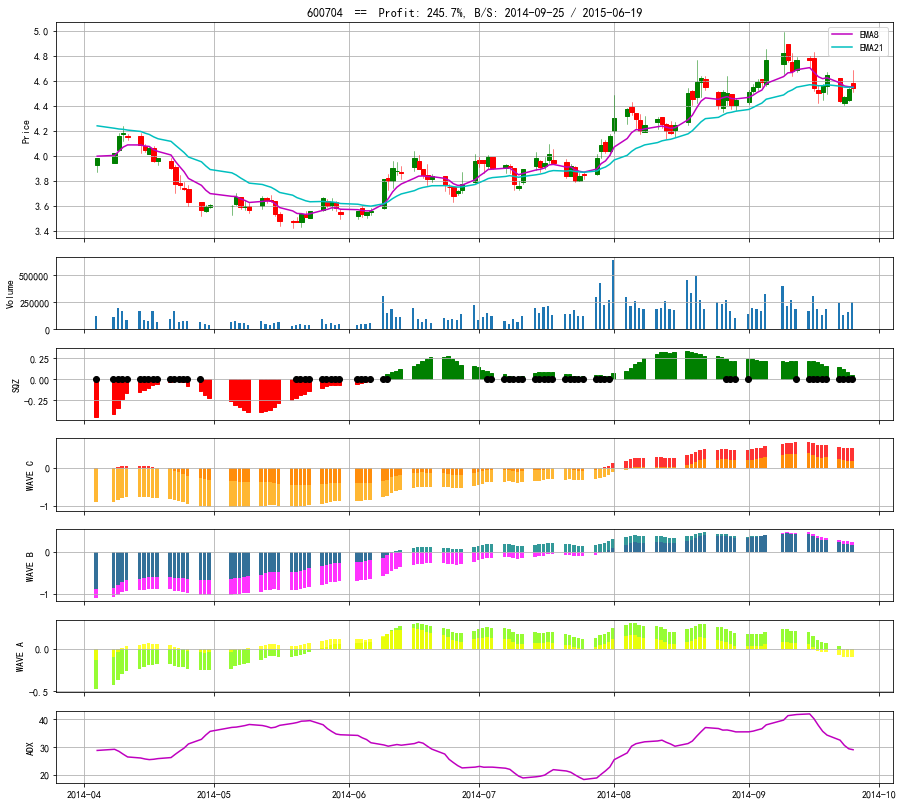

In [64]:
import random, math

# plot a random good sample

CONST_PROFIT_THRESHOLD = 0.27  # find sample's profit bigger than
CONST_PROFIT_PERDAY_THRESHOLD = 0.004  # find sample's profit bigger than

while (1):
    # generate a random number
    pindex = random.randint(0, Y_all.shape[0]-1)
  
    # if (Y_all.iloc[pindex].profit > CONST_PROFIT_THRESHOLD):
    if (Y_all.iloc[pindex]['profit.per.day'] > CONST_PROFIT_PERDAY_THRESHOLD):
        pstock_data = X_all.iloc[(pindex * dp.CONST_LOOKBACK_SAMPLES):((pindex +1) * dp.CONST_LOOKBACK_SAMPLES)]
        title_postfix = ' ==  Profit: ' + str(round(Y_all.iloc[pindex].profit * 100, 1)) + '%,' + ' B/S: ' + Y_all.iloc[pindex].buy_date + ' / ' + Y_all.iloc[pindex].sell_date
        dp.plot_stock_data(pstock_data, title_postfix)
        print(Y_all.iloc[pindex])
        break
    else:
        continue


In [ ]:
# keep 'profit', which is a percentage rate of profit
Y_all_cleanup = Y_all.drop(['mpl.buy_date', 'mpl.sell_date', 'hold_days', 'buy_date', 'buy_price', 'code', 'sell_date', 'sell_price', 'sell_reason'], axis=1)
print(Y_all_cleanup.head(1))
print(Y_all_cleanup.shape)
print('No. of samples with positive profit higher than 20%: ', Y_all_cleanup[Y_all_cleanup.profit>0.2239].count())

#### Visualize Y_all 'hold_days' and 'profit'

In [ ]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

# plot 'hold_days' (Day) and 'profit' (%) relationship
#  - colorbar indicates percentage (%) of earn per Day.

# figure 1
# Y_profit = Y_all
Y_profit = Y_all[Y_all['profit.per.day'] > 0.004]  # 0.0231 is 90 percentile value.

plt.figure(figsize=(15, 5))
plt.scatter(Y_profit['hold_days'].values,  # hold days
            Y_profit['profit.per.day'].values,  # increment % per day
            # c=Y_profit['profit']*100,  # profit percentage %
            c=Y_profit['code.sn'],  # per stock per color
            cmap=plt.get_cmap('rainbow'),
            marker='o',
            s=2)  # s size
plt.colorbar()
plt.grid(True)
plt.xlabel('Days')
plt.ylabel('Profit Per Day')
plt.show()

# figure 2
Y_profit = Y_all[Y_all['profit'] > 0.2784]  # 90 percentile
plt.figure(figsize=(15, 5))
plt.scatter(Y_profit['hold_days'].values,  # hold days
            Y_profit['profit'].values,  # increment % per day
            # c=Y_profit['profit.per.day'],  # profit percentage %
            c=Y_profit['code.sn'],  # per stock per color
            cmap=plt.get_cmap('rainbow'),
            marker='o',
            s=2)
plt.colorbar()
plt.grid(True)
plt.xlabel('Days')
plt.ylabel('Profit Percentage')
plt.show()

# figure 3
Y_profit = Y_all[Y_all['profit.per.day'] > 0.004]
# Y_profit = Y_all[Y_all['profit'] > 0.1]
# Y_profit = Y_all[Y_all['code'] == '601318']
# Y_profit = Y_all
print(Y_profit.shape[0])

fig, axes = plt.subplots(2, 2, figsize=(15,14), sharex=True, gridspec_kw={'height_ratios':[1, 1], 'width_ratios':[10,1]})

# format the ticks
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator(interval=1)  # every month
ymdFmt = mdates.DateFormatter('%Y-%m-%d')

sc = axes[0, 0].scatter(Y_profit['mpl.buy_date'].values,  # hold days
                Y_profit['profit.per.day'].values,  # increment % per day
                c=Y_profit['code.sn'],  # profit percentage %
                cmap=plt.get_cmap('rainbow'),  # gist_ncar'),  # tab20b "RdYlGn",  # "RdYlGn"
                marker='o',
                s=2)
fig.colorbar(sc)

axes[0, 0].legend(loc=0)
axes[0, 0].set_ylabel('Profit Per Day')
axes[0, 0].set_xlabel('Buy_date')

axes[0, 0].xaxis.set_major_locator(years)
axes[0, 0].xaxis.set_major_formatter(ymdFmt)
axes[0, 0].xaxis.set_minor_locator(months)
axes[0, 0].format_xdata = mdates.DateFormatter('%Y-%m-%d')

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

# and a corresponding grid                                                       
axes[0, 0].grid(which='major', alpha=0.5)                                                            
axes[0, 0].grid(which='minor', alpha=0.2)                                                            
axes[0, 0].grid(True)

axes[0, 0].xaxis_date()

# add hs300
hs300_data_p = hs300_data.iloc[400:]
axes[0, 0].plot(hs300_data_p['mpl.date'].values,  # x
             hs300_data_p['close'].values/100000,  # y
             label = 'HS300')

axes[1, 0].scatter(Y_profit['mpl.buy_date'].values,  # hold days
                Y_profit['profit'].values,  # increment % per day
                c=Y_profit['code.sn'],  # profit percentage %
                cmap=plt.get_cmap('rainbow'),
                marker='o',
                s=2)
axes[1, 0].legend(loc=0)
axes[1, 0].set_ylabel('Profit')
axes[1, 0].set_xlabel('Buy_date')

axes[1, 0].xaxis.set_major_locator(years)
axes[1, 0].xaxis.set_major_formatter(ymdFmt)
axes[1, 0].xaxis.set_minor_locator(months)
axes[1, 0].format_xdata = mdates.DateFormatter('%Y-%m-%d')

axes[1, 0].grid(which='major', alpha=0.5)                                                            
axes[1, 0].grid(which='minor', alpha=0.2)   

# add hs300
hs300_data_p = hs300_data.iloc[400:]
axes[1, 0].plot(hs300_data_p['mpl.date'].values,  # x
             hs300_data_p['close'].values/800,  # y
             label = 'HS300')

axes[1, 0].grid(True)

# turn off unused
axes[0, 1].set_axis_off()
axes[1, 1].set_axis_off()


In [ ]:
import seaborn as sns

Y_profit = Y_all[Y_all['profit.per.day'] > 0.004]  # 0.004 is 90 percentile
#Y_profit = Y_all[Y_all['profit'] > 0.2239]

stock_list = Y_profit.groupby(level=0).size().reset_index(name='counts')

print(stock_list)
#for index, row in stock_list.iterrows():
#    print(row['code'])

sns.distplot(stock_list['counts'].values, bins=60, kde=False, rug=False)
plt.xlabel('单支股票产生的Sample数')
plt.ylabel('几只股票')
plt.grid(True)
plt.show()

#### Visualize Y_all 'profit' Distribution Hisogram
#### Percentile Y_all 'profit'

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Y_profit_np = Y_all['profit'].values

# quantile
print(np.percentile(Y_profit_np, 95))  # 95th percentile
# percentile at 10% steps
print(np.percentile(Y_profit_np, np.arange(0, 100, 10)))  # deciles
# double check
print(Y_all.shape[0], 'vs.', Y_all[Y_all.profit>=np.percentile(Y_profit_np, 90)].shape[0])
print(Y_all['profit'].values.min(), Y_all['profit'].values.max())

sns.distplot(Y_all['profit'].values.tolist(), bins=50, kde=False, rug=False)

# sns.distplot(Y_all[Y_all['profit']>0]['profit'].values, bins=50, kde=False, rug=False)
plt.grid(True)
plt.show()

#### Calculate sigmoid('profit' * 100 - 22.39 + 2)

In [ ]:
from scipy.special import expit  # expit is sigmoid()

print(expit(2))  # example why choose 2

Y_profit_90p = np.percentile(Y_all['profit'].values, 90)
print('90 percentile of Y_all.profit: ', Y_profit_90p)

expit(Y_all['profit'].values.tolist()  * 100 )

Y_all['sigmoid.profit'] = expit((Y_all['profit'].values  * 100 - Y_profit_90p * 100 + 2).tolist())
                                                    # .tolist(): convert ndarray to list
                                                    # 2: sigmoid(2)=0.88, bigger enough to 1.0

# print(Y_all['sigmoid.profit'])
sns.distplot(Y_all['sigmoid.profit'].values.tolist(), bins=50, kde=False, rug=False)
#sns.distplot(t, bins=50, kde=False, rug=False)

plt.grid(True)
plt.show()

sns.distplot(Y_all['profit'].values.tolist(), bins=50, kde=False, rug=False)
plt.grid(True)
plt.show()

#### Calculate sigmoid('profit.per.day')

In [ ]:
from scipy.special import expit
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

t = Y_all['profit.per.day'].values.tolist()  # convert numpy.ndarrary to list
# print(type(t))
# print(np.isnan(t))
print('Sanity check. any NaN? ', np.isnan(t).any())
print(np.arange(0,100,10))
print('Profit.per.day pencentile: \n', np.percentile(Y_all['profit.per.day'].values, np.arange(0, 100, 10)))
print('min: ', Y_all['profit.per.day'].min())

sns.distplot(Y_all[Y_all['profit.per.day']>0.004]['profit.per.day'].values.tolist(), bins=50, kde=False, rug=False)
plt.grid(True)
plt.show()

sns.distplot(Y_all['profit.per.day'].values.tolist(), bins=50, kde=False, rug=False)
plt.grid(True)
plt.show()

#### Samples Standadization

归一化


INPUT
=====
X_all: DataFrame with all samples and all features.

OUTPUT
======
X_all_cleanup: DataFrame with all samples,
    - but trimming off unnessary features. 'ATR', 'LOW10', etc. are dropped.

X_all_cleanup_std: DataFrame,
    - which keep one sample in every CONST_ONE_OUT_OF_NUMBER samples.
    - with all features standardized.

In [ ]:
# drop column 'ATR', 'LOW10', 'open', 'high', 'low', 'code'
X_all_cleanup = X_all.drop(['ATR', 'LOW10', 'open', 'high', 'low', 'code'], axis=1)

# print(X_all_cleanup.head())
# X_all_cleanup.shape
print(X_all_cleanup.describe())

#### Pick up X samples, and Standardize them

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler

scaler = MinMaxScaler()
absscaler = MaxAbsScaler()

CONST_ONE_OUT_OF_NUMBER = 1

# Note:
#   - 'close', 'EMA8', 'EMA21' these three are correlated, and should be rescaled based on same value.
CONST_LOOKBACK_SAMPLES = 60

total_samples = int(X_all_cleanup.shape[0] / CONST_LOOKBACK_SAMPLES)
X_all_cleanup_std = pd.DataFrame()  # initialize a dataframe.

std_sample_list = []  # define a list for standadized samples. element is pandas DataFrame.

# Initial call to print 0% progress
dp.printProgressBar(0, total_samples - 1, prefix = 'Samples Standardization:', suffix = 'Complete', length = 60)

for i in range(0, total_samples):
    # only keep 1 out of CONST_ONE_OUT_OF_NUMBER
#    if (i % CONST_ONE_OUT_OF_NUMBER != 0):
#        continue
#    if i >= 10000:  # tesing
#        break
    # slice out one sample
    one_sample = X_all_cleanup.iloc[(i * CONST_LOOKBACK_SAMPLES):((i+1) * CONST_LOOKBACK_SAMPLES), :]
    # if (i % 20 == 0):
    #    print(one_sample.head(1))
    # print(one_sample.shape)
    # print(one_sample.columns)
    # print(one_sample.head())
    # print(one_sample.describe())
    # copy to new sample skeleton
    standardized_sample = pd.DataFrame(index=one_sample.index)
    
    # Scaling 'volume'
    standardized_sample['volume'] = scaler.fit_transform(one_sample['volume'].values.reshape(-1,1))
    
    # Scaling 'close', 'EMA8', 'EMA21'. They are co-related, so scale from the same scale.
    # print('close, EMA8, EMA21 scaling:')
    pmin = one_sample['close'].min()
    pmax = one_sample['close'].max()
    standardized_sample['close'] = (one_sample['close'].values - pmin) / (pmax - pmin)
    standardized_sample['EMA8'] = (one_sample['EMA8'].values - pmin) / (pmax - pmin)
    standardized_sample['EMA21'] = (one_sample['EMA21'].values - pmin) / (pmax - pmin)
    
    # plot it
    # fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(60, 15))
    # ax1.set_title('Before Scaling')
    # sns.kdeplot(one_sample['close'], ax=ax1)
    # ax2.set_title('After Scaling')
    # sns.kdeplot(standardized_sample['s_close'], ax=ax2)
    # plt.show()
    
    # Scaling 'ADX'
    standardized_sample['ADX'] = scaler.fit_transform(one_sample['ADX'].values.reshape(-1,1))
    
    # Copy 'SQUEEZE'
    standardized_sample['SQUEEZE'] = one_sample['SQUEEZE']
    
    # Scaling 'MTMMA', 'HIST1' ~ 'HIST5', 'MACD6'
    standardized_sample['MTMMA'] = absscaler.fit_transform(one_sample['MTMMA'].values.reshape(-1,1))
    standardized_sample['HIST1'] = absscaler.fit_transform(one_sample['HIST1'].values.reshape(-1,1))
    standardized_sample['HIST2'] = absscaler.fit_transform(one_sample['HIST2'].values.reshape(-1,1))
    standardized_sample['HIST3'] = absscaler.fit_transform(one_sample['HIST3'].values.reshape(-1,1))
    standardized_sample['HIST4'] = absscaler.fit_transform(one_sample['HIST4'].values.reshape(-1,1))
    standardized_sample['HIST5'] = absscaler.fit_transform(one_sample['HIST5'].values.reshape(-1,1))
    standardized_sample['MACD6'] = absscaler.fit_transform(one_sample['MACD6'].values.reshape(-1,1))
    
    # add it to std_sample_list
    std_sample_list.append(standardized_sample)

    # update progress bar
    dp.printProgressBar(i, total_samples - 1, prefix = 'Samples Standardization:', suffix = 'Complete', length = 60)

print('starting to concat ...')
X_all_cleanup_std = pd.concat(std_sample_list)
print('DONE')

In [ ]:
print(X_all_cleanup_std.shape)
print('Selected X samples: ', X_all_cleanup_std.shape[0]/CONST_LOOKBACK_SAMPLES)
print(X_all_cleanup_std.describe())


#### Pick up Y samples

INPUT
=====
Y_all_cleanup: DataFrame with 'profit' as only column

OUTPUT
======
Y_all_cleanup_std: DataFrame,
    - based from Y_all_cleanup.
    - which keep one sample in every CONST_ONE_OUT_OF_NUMBER samples.

Y_all_binary_profit: DataFrame,
    - based from Y_all_cleanup_std.
    - change 'profit' to a binary value. int(1) or int(0).
        - profit bigger than CONST_PROFIT_THRESHOLD is stored as 1.
        - profit less than or equal to CONST_PROFIT_THRESHOLD is stored as 1.
        


In [ ]:
CONST_PROFIT_THRESHOLD = 0.2239  # take any profit value less than this number as a LOSS.

#
# Y_all_cleanup_std
#

total_samples = int(X_all_cleanup.shape[0] / CONST_LOOKBACK_SAMPLES)
total_samples_y = Y_all_cleanup.shape[0]

if total_samples_y != total_samples:
    print('ERROR: unmatched X and Y samples')

Y_all_cleanup_std = pd.DataFrame()  # initialize a dataframe. Store profit rate as a float number.

for i in range(0, total_samples_y):
    # only keep 1 out of CONST_ONE_OUT_OF_NUMBER
    if (i % CONST_ONE_OUT_OF_NUMBER != 0):
        i +=1
        continue;

    # slice out one sample
    one_sample = Y_all_cleanup.iloc[i:(i+1), :]
    Y_all_cleanup_std = Y_all_cleanup_std.append(one_sample)

#
# Y_all_binary_profit
#

# create binary profit value: 0 for loss, 1 for win.
Y_all_binary_profit = Y_all_cleanup_std.copy()

for index, row in Y_all_cleanup_std.iterrows():
        if row['profit'] > CONST_PROFIT_THRESHOLD:
            Y_all_binary_profit.loc[index]['profit'] = int(1)
        else:
            Y_all_binary_profit.loc[index]['profit'] = int(0)




In [ ]:
print('Y_all_cleanup_std: ', Y_all_cleanup_std.shape)
print('Y_all_binary_profit: ', Y_all_binary_profit.shape)

In [ ]:
Y_all_binary_profit[Y_all_binary_profit['profit']>0.5].count()  # 1 means Good Profit, 0 means Loss

#### Change Y_all_binary_profit to Categorical array

INPUT:
=====
Y_all_binary_profit: Dataframe with binary 'profit' field.

OUTPUT:
=======
Y_all_binary_categorical: Numpy data array in shape [x, 2]
    - two category column. One for Good Profit, the other for Loss.

In [ ]:
from keras.utils import np_utils

Y_all_binary_categorical = np_utils.to_categorical(Y_all_binary_profit)
print(Y_all_binary_categorical)
print(Y_all_binary_categorical.shape)

### Choose Balanced samples for 'Good Profit' and 'Loss'

There are 6626 samples of 'Good Profit', profit bigger than 22.39%. To balance that, choose 6626 (1 out of 9) samples of 'Loss' randomly from the X/Y datasets.

Together, they make a balanced train/test sets.

In [ ]:
#
# pick_one_sample_x_and_y
#


def pick_one_sample_x_and_y(index, X_samples_all, Y_samples_all, len_X_sample=60, len_Y_sample=1):
    ''' Given an index, return the sample's X and Y slice.
    
    Input
    =====
    index: a sequencial int number, denotes index no. of a sample
    X_samples_all: DataFrame, X_all set, with 
    len_X_sample:  integer, is one X_sample's length. Default 60.
    Y_samples_all: DataFrame  Y_all set, with 
    len_Y_sample:  integer, is one Y_sample's length. Default 1.
        
    Output
    ======
    one_sample_x: DataFrame
        the sample's X part
    one_sample_y: DataFrame
        the sample's Y part
    '''
    one_sample_y = Y_samples_all.iloc[(index * len_Y_sample):((index+1) * len_Y_sample), :]
    one_sample_x = X_samples_all.iloc[(index * len_X_sample):((index+1) * len_X_sample), :]

    return one_sample_x, one_sample_y


In [ ]:

#
# generate balanced dataset
#

import random
random.seed('2017-12-02')

# test how many 'profit'/'loss' samples are selected
i = 0  # 'profit'
j = 0  # 'loss'

# init
X_all_picked = pd.DataFrame()  # initialize a dataframe.
Y_all_picked = pd.DataFrame()  # initialize a dataframe.

X_frame = []  # collection of X sample dataframes.
Y_frame = []  # collection of Y sample dataframes.

for index, row in Y_all_binary_profit.iterrows():
    # generate a random number between 1 and 9, inclusive
    selector = random.randint(1, 9)
    
    if (row['profit'] == 0) and (selector <= 8):
        # skip
        continue
    
    # pick it
    one_x_sample, one_y_sample = pick_one_sample_x_and_y(index,
                                                         X_all_cleanup_std,  # X samples all
                                                         Y_all_binary_profit,  # Y samples all
                                                         dp.CONST_LOOKBACK_SAMPLES,  # len of each X sample
                                                         1  # len of each Y sample
                                                        )
    
    # debug code
    if (row['profit'] == 1):
        i += 1
    else:
        j += 1
        
    # add it to X_frame and Y_frame
    X_frame.append(one_x_sample)
    Y_frame.append(one_y_sample)

X_all_picked = pd.concat(X_frame)
Y_all_picked = pd.concat(Y_frame)

'''
iterrate Y_all_cleanup_std by index,
    if profit > 22.39%,
        pick it;
    else,
        generate a random int between 0 and 8, round((total sample numbers -profit sample numbers)/(profit sample numbers))
        if randomint = 0
            pick it;
        else,
            skip it;
    endif
'''

In [ ]:
print(i,j, i+j)
print('X picked: ', X_all_picked.shape[0]/dp.CONST_LOOKBACK_SAMPLES)
print('Y picked: ', Y_all_picked.shape[0])

#### Split to Train and Test

In [ ]:
import random

#
# splict_train_and_test
#


def splict_train_and_test(X_samples_all, Y_samples_all, len_X_sample=60, len_Y_sample=1, train_test_ratio=7):
    ''' Split samples into X_train, Y_train and X_test, Y_test.
    
    Input
    =====
    X_samples_all: DataFrame, X_all set 
    len_X_sample:  integer, is one X_sample's length. Default 60.
    Y_samples_all: DataFrame  Y_all set 
    len_Y_sample:  integer, is one Y_sample's length. Default 1.
        
    train_test_ratio: integer, 
        The ration is defined in train_test_ratio, it's an integer between 1 and 10, inclusive.
        It means in every 10 samples, how many to be used as train.
        And others will be as test.
        
    Output
    ======
    X_train, Y_train: DataFrame
    X_test,  Y_test : DataFrame
    '''

    n_total_samples = int(X_samples_all.shape[0] / len_X_sample)

    Xtn_frame = []  # X_train
    Ytn_frame = []  # Y_train
    Xtt_frame = []  # X_test
    Ytt_frame = []  # Y_test
    
    for index in range(0, n_total_samples):
        # slice out one sample
        one_x_sample, one_y_sample = pick_one_sample_x_and_y(index,
                                                             X_samples_all,  # X samples all
                                                             Y_samples_all,  # Y samples all
                                                             len_X_sample,  # len of each X sample
                                                             len_Y_sample  # len of each Y sample
                                                            )

        # generate a random number
        selector = random.randint(1, 10)

        if selector <= train_test_ratio:
            # put this sample to X_train, and Y_train
            Xtn_frame.append(one_x_sample)
            Ytn_frame.append(one_y_sample)
        else:
            # put this sample to X_test, and Y_test
            Xtt_frame.append(one_x_sample)
            Ytt_frame.append(one_y_sample)

    print('start concat...')
    # concat
    X_train = pd.concat(Xtn_frame)
    Y_train = pd.concat(Ytn_frame)
    X_test = pd.concat(Xtt_frame)
    Y_test = pd.concat(Ytt_frame)
    
    print('Done!')
    return X_train, Y_train, X_test, Y_test


In [ ]:
X_train, Y_train, X_test, Y_test = splict_train_and_test(X_all_picked, Y_all_picked, dp.CONST_LOOKBACK_SAMPLES, 1, 7)

In [ ]:
print("Size of X_train/Y_train: ", int(X_train.shape[0] / dp.CONST_LOOKBACK_SAMPLES), Y_train.shape[0])
print("Size of X_test/Y_test: ", int(X_test.shape[0] / dp.CONST_LOOKBACK_SAMPLES), Y_test.shape[0])

print('How many have positive profit in Y_train?: ', Y_train[Y_train.profit>0].count())
print('How many have positive profit in Y_test?: ', Y_test[Y_test.profit>0].count())


#### Save standardized X/Y samples to csv

In [ ]:
# Save X sample 
# X_all_cleanup_std.to_csv('hs300_20100101-20171124-samples-cleanup-std.csv')
#print(all_data.shape)
#print(all_data.head())

#### Convert X/Y Train/Test to numpy array

In [ ]:
from keras.utils import np_utils

X_train_np = X_train.values.reshape(-1, 60, 13)
X_test_np = X_test.values.reshape(-1, 60, 13)

Y_train_np = Y_train.values
Y_test_np = Y_test.values


# Y_train_np = np_utils.to_categorical(Y_train)
# Y_test_np = np_utils.to_categorical(Y_test)

print('Train X/Y: ', X_train_np.shape, Y_train_np.shape)
print('Test  X/Y: ', X_test_np.shape, Y_test_np.shape)


### 创建 Keras 模型

In [ ]:
### LOAD PACKAGES 
from numpy.random import seed
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense, Flatten

#### Conv1D 模型

##### Common Settings:
- Number of filters: (power of 2, e.g. 32, 64, 128, 512)
- Kernel size: 3, 5, 1
- Stride: 1, 2

In [ ]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Embedding
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.datasets import imdb

# apply a convolution 1d of length 3 to a sequence with CONST_LOOKBACK_SAMPLES timesteps, each with 13-dimensions,
# with 256 output filters
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=3, padding='valid', input_shape=(dp.CONST_LOOKBACK_SAMPLES, 13)))  # , activation='tanh'
print('Model input shape: ', model.input_shape)
print('Conv1D, 512', model.output_shape)

#model.add(Conv1D(filters=256, kernel_size=3, padding='same'))  # , activation='tanh'

model.add(Conv1D(filters=128, kernel_size=3, padding='same'))  # , activation='tanh'
print('Conv1D, 128', model.output_shape)

model.add(Conv1D(filters=32, kernel_size=3, padding='same'))  # , activation='tanh'
print('Conv1D, 32: ', model.output_shape)

# we use max pooling:
model.add(MaxPooling1D(2))
print('MaxPooling1D by 2: model output shape: ', model.output_shape)

model.add(Flatten())
print('Flatten： ', model.output_shape)

# We add a vanilla hidden layer:
model.add(Dense(896, kernel_initializer='normal'))  # , activation='tanh'))
print('Dense, hidden_dims: model output shape: ', model.output_shape)

# We add a vanilla hidden layer:
model.add(Dense(16, kernel_initializer='normal'))  # , activation='tanh'))
print('Dense, hidden_dims 16: model output shape: ', model.output_shape)

model.add(Dropout(0.2))
print('Dropout 0.2: model output shape: ', model.output_shape)

# We project onto a single unit output layer:
model.add(Dense(1, activation='sigmoid'))
print('Dense 1: ', model.output_shape)

# sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
# model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model.compile(loss='mean_squared_error',
#              optimizer='adam',
#              metrics=['accuracy'])

# model.add(Activation('sigmoid'))
# print('Activation sigmoid: ', model.output_shape)

print(model.summary())

#### Start Training
#### Continue previous Training

In [ ]:
# Start training, or
# Continue prvious training: don't do model.compile() which will reset the inner state of the optimizer 
#

# K.clear_session()

batch_size = 32
epochs = 10

model.fit(X_train_np, Y_train_np,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test_np, Y_test_np))

In [ ]:
import tensorflow as tf
from keras.backend import tensorflow_backend as K

with tf.Session(config=tf.ConfigProto(
                    intra_op_parallelism_threads=0)) as sess:
    K.set_session(sess)   # your keras code follows

    # apply a convolution 1d of length 3 to a sequence with CONST_LOOKBACK_SAMPLES timesteps, each with 13-dimensions,
    # with 256 output filters
    model = Sequential()
    model.add(Conv1D(filters=256, kernel_size=3, padding='valid', input_shape=(dp.CONST_LOOKBACK_SAMPLES, 13)))  # , activation='tanh'
    print('Model input shape: ', model.input_shape)
    print('Conv1D, 512', model.output_shape)

    #model.add(Conv1D(filters=256, kernel_size=3, padding='same'))  # , activation='tanh'

    model.add(Conv1D(filters=128, kernel_size=3, padding='same'))  # , activation='tanh'
    print('Conv1D, 128', model.output_shape)

    model.add(Conv1D(filters=32, kernel_size=3, padding='same'))  # , activation='tanh'
    print('Conv1D, 32: ', model.output_shape)

    # we use max pooling:
    model.add(MaxPooling1D(2))
    print('MaxPooling1D by 2: model output shape: ', model.output_shape)

    model.add(Flatten())
    print('Flatten： ', model.output_shape)

    # We add a vanilla hidden layer:
    model.add(Dense(896, kernel_initializer='normal'))  # , activation='tanh'))
    print('Dense, hidden_dims: model output shape: ', model.output_shape)

    # We add a vanilla hidden layer:
    model.add(Dense(16, kernel_initializer='normal'))  # , activation='tanh'))
    print('Dense, hidden_dims 16: model output shape: ', model.output_shape)

    model.add(Dropout(0.2))
    print('Dropout 0.2: model output shape: ', model.output_shape)

    # We project onto a single unit output layer:
    model.add(Dense(1, activation='sigmoid'))
    print('Dense 1: ', model.output_shape)

    sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])


    batch_size = 32
    epochs = 1
    model.fit(X_train_np, Y_train_np,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test_np, Y_test_np))
    
    # clear the session, to avoid session confusion.
    K.clear_session()

### Save Model and Weights to disk

Ref: https://machinelearningmastery.com/save-load-keras-deep-learning-models/

In [ ]:

# file names
model_jason_file_name = 'model-2017-12-03-v2.json'
model_weights_hdf5 = 'model-2017-12-03-v2.h5'

# serialize model to JSON
model_json = model.to_json()
with open(model_jason_file_name, "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights(model_weights_hdf5)
print("Saved model to disk")


#### Load model from disk

In [ ]:
from keras.models import model_from_json

# load json and create model
json_file = open(model_jason_file_name, 'r')
loaded_model_json = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights(model_weights_hdf5)
print("Loaded model from disk")

#### Use loaded model to predict

In [ ]:
# evaluate loaded model on test data
#loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
#score = loaded_model.evaluate(X, Y, verbose=0)
#print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

## Use NN to Predict

### Step 1: fetch todays' K Line

In [ ]:
stock_list_hs300 = ts.get_hs300s()  # 沪深300成分股

sd_t = '2015-05-01'  # start date
ed_t = '2017-12-02'  # end date

# fetch all data in the list. _t means 'today'
all_data_t = dp.fetch_raw_data(stock_list_hs300, sd_t, ed_t)

In [ ]:
print(stock_list_hs300.head(2))
print(all_data_t.tail(2))
print(all_data_t.shape)


### Step 2: Generate features

In [ ]:
# Input: all_data, MultiIndex'ed by 'code' and 'date'
#

CONST_DROP_THRESHOLD_t = 440  # Wave C needs 377, sample lookback needs 60.

all_data_and_features_t = pd.DataFrame()  # stock data with all available features, such as 'SQZ', 'HIST1', and all.


stock_list = all_data_t.groupby(level=0).size().reset_index(name='counts')
# Initial call to print 0% progress
total = stock_list.shape[0]
i = 0
dp.printProgressBar(i, total, prefix = 'Progress:', suffix = 'Complete', length = 60)


for index, row in stock_list.iterrows():  # iterate the stock list
    # slicing one stock_data
    stock_data = all_data_t.loc[row['code']]
    
    # skip if stock_data has less than CONST_DROP_THRESHOLD bars
    if stock_data.shape[0] < CONST_DROP_THRESHOLD_t:
        i += 1
        print('DROP ' + row['code'])
        continue
        
    # print(row['code'], row['name'])
    # print(stock_data.shape)
    
    # add 'EMA8', 'EMA21'
    stock_data = stock_data.join(sb.ttm_propulsion(stock_data))
    # add SQZ
    stock_data = stock_data.join(sb.ttm_squeeze(stock_data))
    # add WAVE
    stock_data = stock_data.join(sb.ttm_wave(stock_data))
    # add ADX
    stock_data = stock_data.join(sb.talib_adx(stock_data))
    # add ATR
    stock_data = stock_data.join(sb.talib_atr(stock_data))
    # add N-bar LOW
    stock_data = stock_data.join(sb.talib_nbarlow(stock_data, N_BAR_LOWEST = 10))
    
    # append to all_data_and_features
    all_data_and_features_t = all_data_and_features_t.append(stock_data)
    
    # update progress bar
    i += 1
    dp.printProgressBar(i, total, prefix = 'Progress:', suffix = 'Complete', length = 60)

# MulitIndex with both 'code' and 'date'
all_data_and_features_t.set_index([all_data_and_features_t['code'], all_data_and_features_t.index], inplace=True)


In [ ]:

print('original all_data: ')
print(all_data_t.columns, '\n', all_data_t.shape)

print('after adding featuresa: ')
print(all_data_and_features_t.columns, '\n', all_data_and_features_t.shape)
print(all_data_and_features_t.head())

### Step 3: In today's K Line, find valid buy samples

In [ ]:
# This function is reused from dp.generate_samples()

#
# generate_buy_samples_given_index
#

# number of bars to look back to form a sample
# CONST_LOOKBACK_SAMPLES = 60

def generate_buy_samples_given_index(stock_data, index):
    ''' Function to generate buy samples for the given 'index'. Index is a datetime value. 
        选出在指定时点下，符合买入规则的数据用例.
   
    Explain
    ======= 
    Given a stock_data, generate buy samples on the given datetime 'index'.
        Currently, using is_squeeze_buy_point() to find buy points.
        
    Input
    =====
    stock_data: DataFrame
        stock_data with full features 'SQZ', WAVE C/B/A, ATR, ADX, etc.
    index: string

    Output
    ======
    '''
    
    
    # Initialize X_all
    X_all = pd.DataFrame()
    
    
    
    if not sb.is_squeeze_buy_point(stock_data, index):
        ## print(index + ' is NOT')
        return X_all
    
    # Yes, this is a squeeze buy point
    # Back fetch N-record
    #
    location_of_buy_point = stock_data.index.get_loc(index)
    first_location = location_of_buy_point - CONST_LOOKBACK_SAMPLES + 1
    if first_location < 0: # there is no enough records to form a valid sample
        # skip it
        return X_all
    
    # Slicing. These are totally CONST_LOOKBACK_SAMPLES of records.
    x_sample = stock_data.iloc[first_location:(location_of_buy_point + 1)]
    # x_sample Validity check.
    if x_sample.isnull().values.any():
        # skip it
        return X_all

    # Add N-record to X_all
    X_all = X_all.append(x_sample, ignore_index = False)

    return X_all

In [ ]:

def get_X_all_t(today_index):

    # Initialize X_all
    X_all_t = pd.DataFrame()

    print('checking: ', today_index)
    # Initial call to print 0% progress
    total = all_data_and_features_t.groupby(level=0).size().shape[0]
    i = 0
    dp.printProgressBar(i, total, prefix = 'Progress:', suffix = 'Complete', length = 60)

    for code, onestock_df in all_data_and_features_t.groupby(level=0):
        # print(code, ' ', onestock_df.shape)

        # generate a MultiIndex tuple    
        this_index = (code, today_index)

        # check to know this index doesn't exist?
        if this_index not in onestock_df.index:
            i += 1
            continue

        onestock_X_all = generate_buy_samples_given_index(onestock_df, this_index)
        # print(onestock_X_all.shape)

        # Add samples to X_all
        X_all_t = X_all_t.append(onestock_X_all, ignore_index = False)

        # update progress
        i += 1
        dp.printProgressBar(i, total, prefix = 'Progress:', suffix = 'Complete', length = 60)

        # testing
        # if i > 50:
        #    break
    return X_all_t

In [ ]:
# Initialize X_all
X_all_t = pd.DataFrame()

'''
X_all_t = X_all_t.append(get_X_all_t('2017-11-01'), ignore_index=False)
X_all_t = X_all_t.append(get_X_all_t('2017-11-02'), ignore_index=False)
X_all_t = X_all_t.append(get_X_all_t('2017-11-03'), ignore_index=False)
X_all_t = X_all_t.append(get_X_all_t('2017-11-06'), ignore_index=False)
X_all_t = X_all_t.append(get_X_all_t('2017-11-07'), ignore_index=False)
X_all_t = X_all_t.append(get_X_all_t('2017-11-08'), ignore_index=False)
X_all_t = X_all_t.append(get_X_all_t('2017-11-09'), ignore_index=False)
X_all_t = X_all_t.append(get_X_all_t('2017-11-10'), ignore_index=False)
X_all_t = X_all_t.append(get_X_all_t('2017-11-13'), ignore_index=False)
X_all_t = X_all_t.append(get_X_all_t('2017-11-14'), ignore_index=False)
X_all_t = X_all_t.append(get_X_all_t('2017-11-15'), ignore_index=False)
X_all_t = X_all_t.append(get_X_all_t('2017-11-16'), ignore_index=False)
X_all_t = X_all_t.append(get_X_all_t('2017-11-17'), ignore_index=False)
X_all_t = X_all_t.append(get_X_all_t('2017-11-20'), ignore_index=False)
X_all_t = X_all_t.append(get_X_all_t('2017-11-21'), ignore_index=False)
X_all_t = X_all_t.append(get_X_all_t('2017-11-22'), ignore_index=False)
X_all_t = X_all_t.append(get_X_all_t('2017-11-23'), ignore_index=False)
X_all_t = X_all_t.append(get_X_all_t('2017-11-24'), ignore_index=False)
X_all_t = X_all_t.append(get_X_all_t('2017-11-27'), ignore_index=False)
X_all_t = X_all_t.append(get_X_all_t('2017-11-28'), ignore_index=False)
X_all_t = X_all_t.append(get_X_all_t('2017-11-29'), ignore_index=False)
X_all_t = X_all_t.append(get_X_all_t('2017-11-30'), ignore_index=False)
'''

X_all_t = X_all_t.append(get_X_all_t('2017-12-01'), ignore_index=False)


In [ ]:
# Initialize X_all
X_all_t = pd.DataFrame()

X_all_t = X_all_t.append(get_X_all_t('2017-10-09'), ignore_index=False)
X_all_t = X_all_t.append(get_X_all_t('2017-10-10'), ignore_index=False)
X_all_t = X_all_t.append(get_X_all_t('2017-10-11'), ignore_index=False)
X_all_t = X_all_t.append(get_X_all_t('2017-10-12'), ignore_index=False)
X_all_t = X_all_t.append(get_X_all_t('2017-10-13'), ignore_index=False)
X_all_t = X_all_t.append(get_X_all_t('2017-10-16'), ignore_index=False)
X_all_t = X_all_t.append(get_X_all_t('2017-10-17'), ignore_index=False)
X_all_t = X_all_t.append(get_X_all_t('2017-10-18'), ignore_index=False)
X_all_t = X_all_t.append(get_X_all_t('2017-10-19'), ignore_index=False)
X_all_t = X_all_t.append(get_X_all_t('2017-10-20'), ignore_index=False)
X_all_t = X_all_t.append(get_X_all_t('2017-10-23'), ignore_index=False)
X_all_t = X_all_t.append(get_X_all_t('2017-10-24'), ignore_index=False)
X_all_t = X_all_t.append(get_X_all_t('2017-10-25'), ignore_index=False)
X_all_t = X_all_t.append(get_X_all_t('2017-10-26'), ignore_index=False)
X_all_t = X_all_t.append(get_X_all_t('2017-10-27'), ignore_index=False)
X_all_t = X_all_t.append(get_X_all_t('2017-10-30'), ignore_index=False)
X_all_t = X_all_t.append(get_X_all_t('2017-10-31'), ignore_index=False)



In [ ]:
print('number of valid samples: ', X_all_t.shape[0]/dp.CONST_LOOKBACK_SAMPLES)

### Step 4: Standardization X_all_t

In [ ]:
# COPY'ed from above

# drop column 'ATR', 'LOW10', 'open', 'high', 'low', 'code'
X_all_cleanup_t = X_all_t.drop(['ATR', 'LOW10', 'open', 'high', 'low', 'code'], axis=1)


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler

scaler = MinMaxScaler()
absscaler = MaxAbsScaler()

# Note:
#   - 'close', 'EMA8', 'EMA21' these three are correlated, and should be rescaled based on same value.
#CONST_LOOKBACK_SAMPLES = 60

total_samples = int(X_all_cleanup_t.shape[0] / CONST_LOOKBACK_SAMPLES)
X_all_cleanup_std_t = pd.DataFrame()  # initialize a dataframe.

# Initial call to print 0% progress
dp.printProgressBar(0, total_samples - 1, prefix = 'Samples Standardization:', suffix = 'Complete', length = 60)

for i in range(0, total_samples):
    # slice out one sample
    one_sample = X_all_cleanup_t.iloc[(i * CONST_LOOKBACK_SAMPLES):((i+1) * CONST_LOOKBACK_SAMPLES), :]
    # if (i % 20 == 0):
    #    print(one_sample.head(1))
    # print(one_sample.shape)
    # print(one_sample.columns)
    # print(one_sample.head())
    # print(one_sample.describe())
    # copy to new sample skeleton
    standardized_sample = pd.DataFrame(index=one_sample.index)
    
    # Scaling 'volume'
    standardized_sample['volume'] = scaler.fit_transform(one_sample['volume'].values.reshape(-1,1))
    
    # Scaling 'close', 'EMA8', 'EMA21'. They are co-related, so scale from the same scale.
    # print('close, EMA8, EMA21 scaling:')
    pmin = one_sample['close'].min()
    pmax = one_sample['close'].max()
    standardized_sample['close'] = (one_sample['close'].values - pmin) / (pmax - pmin)
    standardized_sample['EMA8'] = (one_sample['EMA8'].values - pmin) / (pmax - pmin)
    standardized_sample['EMA21'] = (one_sample['EMA21'].values - pmin) / (pmax - pmin)
    
    # plot it
    # fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(60, 15))
    # ax1.set_title('Before Scaling')
    # sns.kdeplot(one_sample['close'], ax=ax1)
    # ax2.set_title('After Scaling')
    # sns.kdeplot(standardized_sample['s_close'], ax=ax2)
    # plt.show()
    
    # Scaling 'ADX'
    standardized_sample['ADX'] = scaler.fit_transform(one_sample['ADX'].values.reshape(-1,1))
    
    # Copy 'SQUEEZE'
    standardized_sample['SQUEEZE'] = one_sample['SQUEEZE']
    
    # Scaling 'MTMMA', 'HIST1' ~ 'HIST5', 'MACD6'
    standardized_sample['MTMMA'] = absscaler.fit_transform(one_sample['MTMMA'].values.reshape(-1,1))
    standardized_sample['HIST1'] = absscaler.fit_transform(one_sample['HIST1'].values.reshape(-1,1))
    standardized_sample['HIST2'] = absscaler.fit_transform(one_sample['HIST2'].values.reshape(-1,1))
    standardized_sample['HIST3'] = absscaler.fit_transform(one_sample['HIST3'].values.reshape(-1,1))
    standardized_sample['HIST4'] = absscaler.fit_transform(one_sample['HIST4'].values.reshape(-1,1))
    standardized_sample['HIST5'] = absscaler.fit_transform(one_sample['HIST5'].values.reshape(-1,1))
    standardized_sample['MACD6'] = absscaler.fit_transform(one_sample['MACD6'].values.reshape(-1,1))
    
    X_all_cleanup_std_t = X_all_cleanup_std_t.append(standardized_sample)
    dp.printProgressBar(i, total_samples - 1, prefix = 'Samples Standardization:', suffix = 'Complete', length = 60)


In [ ]:
print(X_all_cleanup_std_t.info)

### Step 5: Predict

In [ ]:
print(X_all_cleanup_std_t.values.reshape(-1, 60, 13).shape)
result = model.predict(X_all_cleanup_std_t.values.reshape(-1, 60, 13), batch_size=32, verbose=1)

In [ ]:
# make Y_all_std_t 
yindex=range(0, int(X_all_cleanup_std_t.shape[0]/dp.CONST_LOOKBACK_SAMPLES))

Y_all_std_predicted_t = pd.DataFrame(index=yindex, columns=['predict.profit'])

Y_all_std_predicted_t['predict.profit'] = result
print(Y_all_std_predicted_t.sort_values(['predict.profit']))

### Step 6: Visaulize it!


In [ ]:
# after 60 epochs
# 9347/9347 [==============================] - 65s - loss: 0.4525 - acc: 0.7912 - val_loss: 0.8121 - val_acc: 0.6486

# pindex = 2  # 2 潍柴动力 # 27 中信银行 # 3 阳光城 # 5 分众传媒 # 22 工商银行 # 5  # 3  # 27  # 2  # Profit Good (2 is max)
# pindex = # 15 伊利股份 # 7 立讯精密 # 4 双汇发展 #21 广深铁路  # 16 长江电力 # Loss (16 is less)

# after another 100 epochs, accu=0.
# 9347/9347 [==============================] - 59s - loss: 0.3649 - acc: 0.8394 - val_loss: 1.0057 - val_acc: 0.6653.

pindex = 18  # 0 华侨城 # 5 分众传媒 # 10 上港集团 # 1 美的集团 # 22 工商银行 # 3 阳光城 # 18 大秦铁路 # Profit Good (18 is max)
# pindex = 7  # 7 立讯精密 # 9 包钢股份  # 11 中国石化 # 16 长江电力 # 8 上海机场 # 21 广深铁路 # 12 万华化学 # Loss (12 is less)

# make a title
title_postfix = ' == Predicted (Profit +22%) Confidence Level: ' + str(Y_all_std_predicted_t.iloc[pindex]['predict.profit'])

# plot it
plot_one_x_sample(pindex, X_all_t, dp.CONST_LOOKBACK_SAMPLES, title_postfix)

# plot_one_x_sample(pindex, X_all_cleanup_std_t, dp.CONST_LOOKBACK_SAMPLES, title_postfix)


In [ ]:
#
# plot_one_x_sample
#


def plot_one_x_sample(pindex, X_samples_all, len_X_sample=60, title_postfix=''):
    ''' Plot one X sample.
    
    Input
    =====
    pindex: Integer. the index X sample will be plot.
    X_samples_all: DataFrame, X_all set 
    len_X_sample:  integer, is one X_sample's length. Default 60.

    title_postfix: String, a title postfix
    
    Output
    ======
    None
    '''
    # validity check
    if (pindex >=  X_samples_all.shape[0] / len_X_sample) or (index <0):
        print('Error: Wrong Input index')
        return

    pstock_data = X_samples_all.iloc[(pindex * len_X_sample):((pindex +1) * len_X_sample)]
    plot_stock_data(pstock_data, title_postfix)
    
    return
        


In [ ]:
#
# stock_code_to_name
#

def stock_code_to_name(code, stock_list):
    ''' From stock 'code' to get stock 'name'
    
    Input
    =====
    code: stock code, eg. '000338'
    stock_list: the stock list to search for
    
    Output
    ======
    name: string, of the stock name. eg. '潍柴动力'
    '''
    

### 解决 matplotlib 中文显示的问题

In [ ]:
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体  
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题  

In [ ]:
df1 = all_data.loc['002839']
print(df1.shape)

# add 1st featue
df1_propulsion = ttm_propulsion(df1)
# a = df1_propulsion.join(df1.drop(['code'], axis=1))
a = df1.join(df1_propulsion)

# a.rename(columns={'EMA8':'EMA8a', 'EMA21':'EMA21a'}, inplace=True)

# add 2nd feature，concatination
b = a.join(ttm_squeeze(a))

# add 3rd feature, concat. TTM Wave C/B/A
d = b.join(ttm_wave(b))

print(d.columns)
print(d.describe())

sd = '2017-05-04'
ed = '2017-12-04'
print("TTM Wave C:")
d.loc[sd:ed][['HIST5', 'MACD6']].plot()
plt.show()
#print(d.loc['2017-09-10':ed][['close', 'HIST5', 'MACD6', 'SQUEEZE', 'MTMMA']])

print("TTM Wave B:")
d.loc[sd:ed][['HIST3', 'HIST4']].plot()
plt.show()
#print(d.loc[sd:ed][['close', 'EMA8', 'EMA21', 'HIST3', 'HIST4']])

print("TTM Wave A:")
d.loc[sd:ed][['HIST1', 'HIST2']].plot()
plt.show()
#print(d.loc[sd:ed][['close', 'EMA8', 'EMA21', 'HIST1', 'HIST2']])

# add 4th feature, concat. ADX
e = d.join(talib_adx(d))
print(e.columns)
print("ADX:")
e.loc[sd:ed]['ADX'].plot()
plt.show()
e.loc[sd:ed][['close']].plot()
plt.show()
print(e.loc[sd:ed][['ADX', 'SQUEEZE', 'MTMMA']])

# add 5th feature, N-Bar low
f = e.join(talib_nbarlow(e, 10))
print(f.columns)
f.loc[sd:ed][['close', 'LOW10']].plot()
plt.show()

# add 6th feaure, ATR

g = f.join(talib_atr(f))
print(g.columns)
g.loc[sd:ed][['ATR']].plot()
plt.show()


In [ ]:
stock_list_sz50 = ts.get_sz50s()
stock_list_sz50.columns

### 获取日K线

In [ ]:
df1 = ts.get_k_data('000001')
df2 = ts.get_k_data('000002')
df1.head()
df2.head()

In [ ]:
import matplotlib.pyplot as plt

df.set_index('date', inplace=True)
print(df.head(2))
df['close'].plot()
plt.show()

### Pandas Panel 学习

- Ref: Panel 结构： http://www.jianshu.com/p/424e61c2f8b8
- Ref: 米筐 Pandas 教程： https://www.ricequant.com/community/topic/3558/

In [ ]:
import numpy as np

data = {'000001' : pd.DataFrame(np.random.randn(10, 3)),'000002' : pd.DataFrame(np.random.randn(3, 5))}
pnl = pd.Panel(data)
print(pnl['000001'].describe())
print(pnl['000002'].describe())


In [ ]:
# combine df1 and df2 into Panel
data = {'000001' : df1,'000002' : df2}
pnl = pd.Panel(data)
# panel['']
print(pnl)

dfextracted = pnl['000001']
dfextracted.set_index('date', inplace=True)
dfextracted.head()

### 获取近期5分钟行情


In [ ]:
m5df = ts.get_k_data('600000', ktype='5')
m5df.head()

newdf = m5df[[]]
newdf.head()

### Join， 选取指定日期的数据

给定df，包含全部日期数据。
给定日期范围dates。
选出dates内的数据：df_dates。

只使用‘close’

In [ ]:
import pandas as pd

start_date = '2017-01-01'
end_date = '2017-01-31'
dates = pd.date_range(start_date, end_date)
df_dates = pd.DataFrame(index=dates)
df_dates.shape
# print(df_dates)

# slicing, use only 'close', and rename it to 'stock ID'
df_dates = df_dates.join(df['close'])
df_dates.rename(columns={'close':'600000'}, inplace=True)
df_dates.dropna(inplace=True)
print(df_dates)

### 学习 MultiIndex Dataframe

- Ref： http://blog.csdn.net/tpoy0099/article/details/49074551

### Example: fetch_raw_data()

In [ ]:
import tushare as ts
#Eg.
# stock_list_hs300 = ts.get_hs300s()
stock_list_test = pd.DataFrame([{'code':'000001'}, {'code':'000002'}])
print(stock_list_test)

dp.printProgressBar(0, total, prefix = 'Progress:', suffix = 'Complete', length = 60)

a = dp.fetch_raw_data(stock_list_test, '2010-01-01', '2017-12-20')
print(a.columns)
print(a)

### Example MultiIndex Slicing

Ref:
- [1] https://pandas.pydata.org/pandas-docs/stable/advanced.html


In [ ]:
stock_id_1 = '000001'
stock_id_2 = '000002'

# to get one stock's data
stock_1_data = a.loc[stock_id_1]
stock_2_data = a.loc[stock_id_2]
print(stock_1_data.shape)
print(stock_2_data.shape)
print(stock_1_data.describe())
print(stock_2_data.describe())

# to get all stock's data on a specific date
# Don't know yet.

### 使用举例

- 使用了两个DataFrame函数：join()， 和 drop()
- 使用 rename()
- 使用花括号，curl braces {}, to define a dictionary.

In [ ]:
# examples. Get base data
import tushare as ts
import matplotlib.pyplot as plt
import pandas as pd

df1 = ts.get_k_data('000421', start='2011-01-01', end='2017-12-01')
df1.set_index('date', inplace=True)
print(df1.shape, df1.index)
print(df1.columns)
print(df1.head())

### 例子， 为股票增加feature

In [ ]:

# add 1st featue
df1_propulsion = ttm_propulsion(df1)
# a = df1_propulsion.join(df1.drop(['code'], axis=1))
a = df1.join(df1_propulsion)

# a.rename(columns={'EMA8':'EMA8a', 'EMA21':'EMA21a'}, inplace=True)

# add 2nd feature，concatination
b = a.join(ttm_squeeze(a))

# add 3rd feature, concat. TTM Wave C/B/A
d = b.join(ttm_wave(b))

print(d.columns)
print(d.describe())

sd = '2017-05-04'
ed = '2017-12-04'
print("TTM Wave C:")
d.loc[sd:ed][['HIST5', 'MACD6']].plot()
plt.show()
#print(d.loc['2017-09-10':ed][['close', 'HIST5', 'MACD6', 'SQUEEZE', 'MTMMA']])

print("TTM Wave B:")
d.loc[sd:ed][['HIST3', 'HIST4']].plot()
plt.show()
#print(d.loc[sd:ed][['close', 'EMA8', 'EMA21', 'HIST3', 'HIST4']])

print("TTM Wave A:")
d.loc[sd:ed][['HIST1', 'HIST2']].plot()
plt.show()
#print(d.loc[sd:ed][['close', 'EMA8', 'EMA21', 'HIST1', 'HIST2']])

# add 4th feature, concat. ADX
e = d.join(talib_adx(d))
print(e.columns)
print("ADX:")
e.loc[sd:ed]['ADX'].plot()
plt.show()
e.loc[sd:ed][['close']].plot()
plt.show()
print(e.loc[sd:ed][['ADX', 'SQUEEZE', 'MTMMA']])

# add 5th feature, N-Bar low
f = e.join(talib_nbarlow(e, 10))
print(f.columns)
f.loc[sd:ed][['close', 'LOW10']].plot()
plt.show()

# add 6th feaure, ATR

g = f.join(talib_atr(f))
print(g.columns)
g.loc[sd:ed][['ATR']].plot()
plt.show()



In [ ]:
# EXAMPLE
# create Series from Dictionary

data = {'A':1, 'B':2, 'C':3}
y_sample = pd.Series(data)
print(y_sample)
print(y_sample['A'])

data2 = {'A':10, 'B':20, 'C':pd.np.nan}
y_sample2 = pd.Series(data2)

print(y_sample2)

dft = pd.DataFrame()
dft = dft.append(y_sample, ignore_index=True)
if dft.isnull().values.any():
    print('there is NaN')
else:
    print('there is no NaN')

dft = dft.append(y_sample2, ignore_index=True)
print(dft)

print('append a dataframe')
dft = dft.append(dft, ignore_index=True)
print(dft)

## 选出符合规则的数据做 训练用例

从给定的股票数据，根据 买入规则， 卖出规则，选出相符合的数据序列，用作 训练用例


In [ ]:
import pandas as pd

# generate_samples
# Explain:
#    - from a given stock_data, generate buy/sell samples
#    - currently, using is_squeeze_buy_point() to find buy points
#                 using get_sell_point() to find sell points
# Input:
#    - stock_data: stock_data with features
# Output:
#    - X_all: all samples' X part, concatenated, in DataFrame
#    - Y_all: all samples' Y part, concatenated, in DataFrame
#

# number of bars to look back to form a sample
CONST_LOOKBACK_SAMPLES = 30

def generate_samples(stock_data):
    # Initialize X_all and Y_all
    X_all = pd.DataFrame()
    Y_all = pd.DataFrame()

    for index, row in stock_data.iterrows():
        # is this row a buy-point?
        if not is_squeeze_buy_point(stock_data, index):
            ## print(index + ' is NOT')
            # check next row
            continue

        # Yes, it is a buy-point.
        # Let's check when is the sell-point.
        sell_index, sell_reason = get_sell_point(stock_data, index)

        # Do we hit a sell point?
        if sell_reason == 0: # No, skip it
            continue

        ## print('=======')
        ## print(index + ' is YES')
        ## print(sell_index, 'is SELL POINT')
        ## print(sell_reason, 'is SELL REASON')
        ## print('Buy  @ ', stock_data['close'][index])
        ## print('Sell @ ', stock_data['close'][sell_index])
        ## print('=======')

        # Back fetch N-record
        location_of_buy_point = stock_data.index.get_loc(index)
        first_location = location_of_buy_point - CONST_LOOKBACK_SAMPLES + 1
        if first_location < 0: # there is no enough records to form a valid sample
            # skip it
            continue

        # Slicing. These are totally CONST_LOOKBACK_SAMPLES of records.
        x_sample = stock_data.iloc[first_location:(location_of_buy_point + 1)]
        # x_sampel Validity check.
        if x_sample.isnull().values.any():
            # skip it
            continue

        # create y_sample as a pandas.Series
        y_raw_data = {'code': row['code'],
                      'buy_date': index,
                      'buy_price': stock_data['close'][index],
                      'sell_date': sell_index,
                      'sell_price': stock_data['close'][sell_index],
                      'sell_reason': sell_reason}
        y_sample = pd.Series(y_raw_data)
        # y_sample validity check
        if y_sample.isnull().values.any():
            # skip it
            continue

        # Add N-record to X_all
        X_all = X_all.append(x_sample, ignore_index = False)
        # Add sell-point information to Y_all.
        Y_all = Y_all.append(y_sample, ignore_index = True)

        #### END of for loop ####

    return X_all, Y_all

In [ ]:
# Testing and Studying
# Examples of basic syntax

import talib
import matplotlib.pyplot as plt

# data preparation
# stock_data = stock_1_data
sd = '2015-01-30'
ed = '2016-01-30'
stock_data = g[sd:ed]
print(stock_data.columns)
print(type(stock_data.index))

cur_date = '2015-10-01'
remaining_s_data = stock_data[cur_date:]

print('first index in remaing_s_data', remaining_s_data.index[0])
print('it\'s location in stock_data', stock_data.index.get_loc(remaining_s_data.index[0]))

buy_point_loc = stock_data.index.get_loc(remaining_s_data.index[0])
first_loc = buy_point_loc - 5 + 1

# slicing
sample_x_test = stock_data.iloc[first_loc:(buy_point_loc+1)]

print(sample_x_test)

print('remaining data\'s index')
print(remaining_s_data.index)

# 10 days low
N_BAR_LOWEST = 10
nbar_lowest_col_name = 'LOW' + str(N_BAR_LOWEST)
stock_data[nbar_lowest_col_name] = talib.MIN(stock_data['low'].values, timeperiod = N_BAR_LOWEST)
stock_data[nbar_lowest_col_name] = stock_data[nbar_lowest_col_name].shift(1)

stock_data[['close', nbar_lowest_col_name]].plot()
plt.show()
print(stock_data[['low', 'close', nbar_lowest_col_name]])

print('===========')
print('===========')
print('===========')
print('===========')

X_all, Y_all = generate_samples(stock_data)
print(X_all.shape, Y_all.shape)
print(Y_all)





### 定义 SQUEEZE 选股规则

In [ ]:
import pandas as pd

# is_squeeze_buy_point
# Explain:
#    - Is the current index'ed bar a squeeze buy-point?
# Input:
#    - stock_data: stock_data with features 'SQUEEZE', TTM Wave C/B/A, and ADX ready
#    - index: current index
# Output:
#    - Return: boolean, True or False
#

# define squeeze CONST
CONST_SQUEEZE_RELEASED = -1
CONST_SQUEEZE_ONGOING = 1

def is_squeeze_buy_point(stock_data, index):
    # FEATUREs Required: 
    #      - 'SQUEEZE', 'HIST5', and 'MACD6'
    # RULE:
    #      - a) TTM Wave C, ie. 'HIST5' and 'MACD6', must be greater than '0'. Then,
    #      - b) 'SQUEEZE' should be either ongoing, or on the first bar of releasing.
    # 
    ret = False
    
    # test TTM Wave C > 0
    if (stock_data.loc[index, 'HIST5'] <= 0) or (stock_data.loc[index, 'MACD6'] <= 0):
        ret = False
        return ret
    
    # test whether 'SQUEEZE' is on-going
    if (stock_data.loc[index, 'SQUEEZE'] == CONST_SQUEEZE_ONGOING):
        ret = True
        return ret
    
    # test whether on the first bar of 'SQUEEZE' release
    if (stock_data.loc[index, 'SQUEEZE'] == CONST_SQUEEZE_RELEASED):
        # check previous bar is 'SQUEEZE' ongoing?
        if (stock_data['SQUEEZE'].shift(1)[index] == CONST_SQUEEZE_ONGOING):
            ret = True
            return ret
    
    return ret

### 定义卖出规则

In [ ]:
# get_sell_point
# Explain:
#    - Find the sell point
# Input:
#    - stock_data: stock data with features
#    - buy_index: the bar where we start the trade
#    - multi_atr: multiple of ATR as stop loss at
#    - n_low: close breaks n_low bar's low
# Output:
#    - sell_index: index of the sell point, or
#                  0 if cannot find sell point before the end
#    - sell_reason: 1 for stop loss, or 2 for N-bar low breakthrough.
#                  0 if not reached any sell point.
#

CONST_SELL_REASON_STOP_LOSS = 1
CONST_SELL_REASON_N_LOW =2

def get_sell_point(stock_data, buy_index, multi_atr = 2, n_low = 10):
    # FEATUREs Required: 
    #      - 'close', 'ATR'
    # RULE: check each bar after buy_index
    #      - a) close price is lower than (multi_atr * ATR)
    #      - b) close lower than prvious n_low bars' low
    # 
    sell_index = 0
    sell_reason = 0
    
    # where we start the trade
    buy_price = stock_data['close'][buy_index]
    stop_price = buy_price - stock_data['ATR'][buy_index] * multi_atr
    #print('buy_price: ', buy_price)
    #print('stop_price: ', stop_price)
    
    remaining_stock_data = stock_data[buy_index:]
    n_low_col_name = 'LOW' + str(n_low)
            
    # check when to sell
    for index, row in remaining_stock_data.iterrows():
        if row['close'] <= stop_price: # down-break stop_price
            # print('today close is lowet than stop_price')
            # print(row['close'])
            # print(stop_price)
            sell_index = index
            sell_reason = CONST_SELL_REASON_STOP_LOSS
            break
        
        # close at a price lower than previous n_low bars' low
        if row['close'] <= row[n_low_col_name]:
            # print(row[['close', col_name]])
            sell_index = index
            sell_reason = CONST_SELL_REASON_N_LOW
            break
    
    return sell_index, sell_reason

In [ ]:

# Input:
#    - stock_data: 

# iterrate each row of stock_data
for index, row in stock_data.iterrows():
    print(index)
    # is this row a buy-point?
    if not is_squeeze_buy_point(stock_data, index, row):
        # check next row
        continue
        
    # Yes, this is a buying-point
    # Find the sell-point
    index_sell = get_sell_point(stock_data, buy_index)
    
    # do we find a valid sell-point? Maybe before our sequence ends, it doesn't reach any sell-point.
    if NOT valid(index_sell):
        # check next row
        continue

    # Back fetch N-record
    # check N-record valid or not
    # Add N-record to X_all
    # Add sell-point information to Y_all.
    
    #### END ####